###### Business Domain: Telecom
###### Services: Providing Telecommunication services (ex: Airtel,Idea,T-mobile,AT&T)   

###### ---------------------------------------------------------------------------------------------------------------------

### Problem Statement

###### Telecom Industry is a higly competitive industry, chances of loosing an existing customer is always high as other  competitor companies  try to lure the customers with deals and promotional offers according to customer needs.
###### But when it comes to Telecom Industry the cost to acquire a new customer costs 5-10 time more compared to retaining a customer.
###### To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.Most pioneer companies identify their high value customers and start with them by promoting offers.


###### ---------------------------------------------------------------------------------------------------------------------

### Approach 

###### We are given a data set containing customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.
###### Customers usually do not decide to switch to another competitor instantly,they do it over period of time  there are three phases of customer lifecycle :
###### The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
###### The ‘action’ phase: The customer experience starts to sore in this phase and will be having thoughts of changing the provider, This can be observed by his usage  patterns, identifying this is very important because this is the Phase to identify the churn and take action.
###### The ‘churn’ phase: In this phase, the customer is said to have churned.This can be identified by observing that there will be no activity on his account.There is nothing actionable in this apart from learning and tagging these customers as churned. 


###### ---------------------------------------------------------------------------------------------------------------------

### Solution

###### Firstly from the given data we can willidentify the high value customers by their monthly average revenue generated.Customers who generate more than 70th percent of the 6th and 7th(good Phase) revenue. Then we can see how many of this customers are having nill activity on their account in 9th month.Based on this observations we can apply the tag Churn 1 or no churn 0.
###### Once we have this data at hand we can observe how these customers behaviour/pattern is in the 8th month(before churning).This would give us an idea of churners behaviour and in future we can easily identify them and promote offers to retain them.
###### We will apply Machine learning Alogrithms we learned so far and compare the metrics for each model.
###### Recommend the best model out of the applied models and derive the feature predictors to identify churn.



 



###### ---------------------------------------------------------------------------------------------------------------------

### Contents

##### 1.Reading and Observing the Data Provided
##### 2.Missing Value Treatment
##### 3.Feature Engineering
##### 4.Performing Data Analysis
##### 5.Applying Logistic Regression with feature selection(without PCA)
##### 6.PCA and Class Imbalance
##### 7.Logistic Regression
##### 8.Descision Tree
##### 9.Random Forest
##### 10.Gradient boosting classifier
##### 11.XG boosting classifier
##### 12.Overall Metrics
##### 13.features to predict churn 
##### 14. Recommendation

## 1.Reading and Observing the Data Provided

In [1]:
# Import the required libraries
import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',230)
pd.set_option("display.max_rows", 300)

In [2]:
# Lets read the data csv and take a look 
churn= pd.read_csv('telecom_churn_data.csv')
churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
churn.shape

(99999, 226)

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
# feature type summary
churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

##### There are in total 99999 rows and 226 features(columns)
##### Out of 226 features  179 are float 35 are int and 12 are object types


###### Lets check if there are any duplicate entries with same mobile numbers 

In [6]:
len(churn.mobile_number.unique())

99999

In [7]:
# Lets read the data csv and take a look 
dict= pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
dict.head(40)

,Acronyms,Descriptions
0,MOBILE_NUMBER,Customer phone number
1,CIRCLE_ID,Telecom circle area to which the customer belo...
2,LOC,Local calls - within same telecom circle
3,STD,STD calls - outside the calling circle
4,IC,Incoming calls
5,OG,Outgoing calls
6,T2T,"Operator T to T, i.e. within same operator (mo..."
7,T2M,Operator T to other operator mobile
8,T2O,Operator T to other operator fixed line
9,T2F,Operator T to fixed lines of T


###### there are no duplicate entries with same mobile numbers

In [8]:
# Lets look at data statistics
churn.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000

###### Lets segregate the columns according to the types 

In [9]:
# create column name list by types of columns

# columns with id

id_cols = ['mobile_number', 'circle_id']


# columns with date features

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

# columns with categorical features

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]


# columns with numerical features 

num_cols = [column for column in churn.columns if column not in id_cols + date_cols + cat_cols]

In [10]:
# print the number of columns in each list
print("\n columns with ids: %d\n columns with date features:%d\n columns with numerical features :%d\n columns with categorical features:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any columns
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols)==len(churn.columns))


 columns with ids: 2
 columns with date features:12
 columns with numerical features :204
 columns with categorical features:8
True


In [11]:
# Lets read the data csv and take a look 
#dict= pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
#dict.head(40)

###### After closely observing the data dictionary we can drop the id columns and date columns as they dont add much value to the analysis

In [12]:
# drop id and date columns
print("Shape before dropping: ", churn.shape)
churn = churn.drop(id_cols , axis=1)
churn = churn.drop(date_cols , axis=1)
print("Shape after dropping: ", churn.shape)

Shape before dropping:  (99999, 226)
Shape after dropping:  (99999, 212)


##  2.Missing Value Treatment

In [13]:
# look at missing value ratio in each column
100*churn.isnull().sum()/len(churn.index)

loc_og_t2o_mou         1.018010
std_og_t2o_mou         1.018010
loc_ic_t2o_mou         1.018010
arpu_6                 0.000000
arpu_7                 0.000000
arpu_8                 0.000000
arpu_9                 0.000000
onnet_mou_6            3.937039
onnet_mou_7            3.859039
onnet_mou_8            5.378054
onnet_mou_9            7.745077
offnet_mou_6           3.937039
offnet_mou_7           3.859039
offnet_mou_8           5.378054
offnet_mou_9           7.745077
roam_ic_mou_6          3.937039
roam_ic_mou_7          3.859039
roam_ic_mou_8          5.378054
roam_ic_mou_9          7.745077
roam_og_mou_6          3.937039
roam_og_mou_7          3.859039
roam_og_mou_8          5.378054
roam_og_mou_9          7.745077
loc_og_t2t_mou_6       3.937039
loc_og_t2t_mou_7       3.859039
loc_og_t2t_mou_8       5.378054
loc_og_t2t_mou_9       7.745077
loc_og_t2m_mou_6       3.937039
loc_og_t2m_mou_7       3.859039
loc_og_t2m_mou_8       5.378054
loc_og_t2m_mou_9       7.745077
loc_og_t

In [14]:

churn.columns[100*churn.isnull().sum()/len(churn.index)>50]

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6',
       'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7',
       'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8',
       'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8',
       'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9'],
      dtype='object')

In [15]:
len(churn.columns[100*churn.isnull().sum()/len(churn.index)>50])

36

###### There are in total 36 features having more than 50% null values.
###### Going ahead we will write a small function for determining the null values

In [16]:
def getMissingValues(missingCutoff):
    missing = round(100*churn.isnull().sum()/len(churn.index),2)
    print("There are {} features having more than {}% missing values".format(len(missing.loc[missing > missingCutoff]),missingCutoff))
    return missing.loc[missing > missingCutoff]

In [17]:
getMissingValues(50)

There are 36 features having more than 50% missing values


total_rech_data_6     74.85
total_rech_data_7     74.43
total_rech_data_8     73.66
total_rech_data_9     74.08
max_rech_data_6       74.85
max_rech_data_7       74.43
max_rech_data_8       73.66
max_rech_data_9       74.08
count_rech_2g_6       74.85
count_rech_2g_7       74.43
count_rech_2g_8       73.66
count_rech_2g_9       74.08
count_rech_3g_6       74.85
count_rech_3g_7       74.43
count_rech_3g_8       73.66
count_rech_3g_9       74.08
av_rech_amt_data_6    74.85
av_rech_amt_data_7    74.43
av_rech_amt_data_8    73.66
av_rech_amt_data_9    74.08
arpu_3g_6             74.85
arpu_3g_7             74.43
arpu_3g_8             73.66
arpu_3g_9             74.08
arpu_2g_6             74.85
arpu_2g_7             74.43
arpu_2g_8             73.66
arpu_2g_9             74.08
night_pck_user_6      74.85
night_pck_user_7      74.43
night_pck_user_8      73.66
night_pck_user_9      74.08
fb_user_6             74.85
fb_user_7             74.43
fb_user_8             73.66
fb_user_9           

In [18]:
# Lets read the data csv and take a look 
#dict= pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
#dict.head(40)

###### Numbers 6,7,8,9 refers to the months.
Looking at the dictionary provided most of the features above are very much useful for analysis.
###### average revenue per user,average recharge amount,facebook users,number of recharges in a month,total data recharge in a month
These can be useful in finding  the high-value customers.
Lets impute this missing values with 0





In [19]:
missing50=churn.columns[100*churn.isnull().sum()/len(churn.index)>50]
churn[missing50]=churn[missing50].fillna(0)

In [20]:
getMissingValues(50)

There are 0 features having more than 50% missing values


Series([], dtype: float64)

In [21]:
getMissingValues(40)

There are 0 features having more than 40% missing values


Series([], dtype: float64)

In [22]:
getMissingValues(30)

There are 0 features having more than 30% missing values


Series([], dtype: float64)

In [23]:
getMissingValues(20)

There are 0 features having more than 20% missing values


Series([], dtype: float64)

In [24]:
getMissingValues(10)

There are 0 features having more than 10% missing values


Series([], dtype: float64)

In [25]:
getMissingValues(5)

There are 58 features having more than 5% missing values


onnet_mou_8         5.38
onnet_mou_9         7.75
offnet_mou_8        5.38
offnet_mou_9        7.75
roam_ic_mou_8       5.38
roam_ic_mou_9       7.75
roam_og_mou_8       5.38
roam_og_mou_9       7.75
loc_og_t2t_mou_8    5.38
loc_og_t2t_mou_9    7.75
loc_og_t2m_mou_8    5.38
loc_og_t2m_mou_9    7.75
loc_og_t2f_mou_8    5.38
loc_og_t2f_mou_9    7.75
loc_og_t2c_mou_8    5.38
loc_og_t2c_mou_9    7.75
loc_og_mou_8        5.38
loc_og_mou_9        7.75
std_og_t2t_mou_8    5.38
std_og_t2t_mou_9    7.75
std_og_t2m_mou_8    5.38
std_og_t2m_mou_9    7.75
std_og_t2f_mou_8    5.38
std_og_t2f_mou_9    7.75
std_og_t2c_mou_8    5.38
std_og_t2c_mou_9    7.75
std_og_mou_8        5.38
std_og_mou_9        7.75
isd_og_mou_8        5.38
isd_og_mou_9        7.75
spl_og_mou_8        5.38
spl_og_mou_9        7.75
og_others_8         5.38
og_others_9         7.75
loc_ic_t2t_mou_8    5.38
loc_ic_t2t_mou_9    7.75
loc_ic_t2m_mou_8    5.38
loc_ic_t2m_mou_9    7.75
loc_ic_t2f_mou_8    5.38
loc_ic_t2f_mou_9    7.75


In [26]:
# Lets read the data dictionary given  and take a look 
#dict= pd.read_excel('Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
#dict.head(40)

In [27]:
missing5=churn.columns[100*churn.isnull().sum()/len(churn.index)>5]
churn[missing5].describe(include='all')

,onnet_mou_8,onnet_mou_9,offnet_mou_8,offnet_mou_9,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_8,std_og_mou_9,isd_og_mou_8,isd_og_mou_9,spl_og_mou_8,spl_og_mou_9,og_others_8,og_others_9,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_8,std_ic_mou_9,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_8,isd_ic_mou_9,ic_others_8,ic_others_9
count,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.0,92254.0,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.0,92254.0,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000,94621.000000,92254.000000
mean,133.018098,130.302327,196.574803,190.337222,7.292981,6.343841,9.971890,8.555519,45.887806,44.584446,91.755128,90.463192,3.677991,3.655123,1.433821,1.232726,141.328209,138.709970,83.282673,82.342919,89.838390,86.276622,1.067792,1.042362,0.0,0.0,174.191498,169.664466,0.791247,0.723892,5.053769,4.412767,0.033372,0.047456,47.211362,46.281794,108.460515,106.155471,11.751834,12.173105,167.432575,164.619293,9.883921,9.432479,21.183211,19.620913,2.085004,2.173419,0.0,0.0,33.154735,31.229344,0.040361,0.163137,8.442001,8.063003,0.970800,1.017162
std,308.951589,308.477668,327.170662,319.396092,68.402466,57.137537,64.713221,58.438186,151.184830,147.995390,156.537048,158.681454,13.270996,13.457549,6.783335,5.619021,245.914311,245.934517,265.486090,267.184991,271.757783,261.407396,7.905971,8.261770,0.0,0.0,411.633049,405.138658,25.544471,21.310751,17.855111,16.328227,2.323464,3.635466,137.239552,140.130610,169.723759,165.492803,39.125379,43.840776,250.025523,249.845070,55.073186,53.376273,83.683565,74.913050,15.812580,15.978601,0.0,0.0,110.127008,101.982303,0.146147,0.527860,63.813098,63.505379,13.284348,12.381172
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.460000,5.330000,31.630000,27.130000,0.000000,0.000000,0.000000,0.000000,1.600000,1.360000,9.810000,8.810000,0.000000,0.000000,0.000000,0.000000,17.110000,15.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.280000,3.290000,18.930000,18.560000,0.000000,0.000000,32.740000,32.290000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.360000,29.840000,92.140000,87.290000,0.000000,0.000000,0.000000,0.000000,11.730000,11.260000,40.360000,39.120000,0.000000,0.000000,0.000000,0.000000,63.730000,61.840000,0.000000,0.000000,3.310000,2.500000,0.000000,0.000000,0.0,0.0,10.410

Mostly the above features are about minutes of usage for on network, off network ,local incoming, local outgoing , incoming and outgoing for all the st,isd,others etc.
Here the null value implies '0'
Lets impute them with zeros

In [28]:
churn[missing5]=churn[missing5].fillna(0)

In [29]:
getMissingValues(5)

There are 0 features having more than 5% missing values


Series([], dtype: float64)

In [30]:
getMissingValues(0)

There are 61 features having more than 0% missing values


loc_og_t2o_mou      1.02
std_og_t2o_mou      1.02
loc_ic_t2o_mou      1.02
onnet_mou_6         3.94
onnet_mou_7         3.86
offnet_mou_6        3.94
offnet_mou_7        3.86
roam_ic_mou_6       3.94
roam_ic_mou_7       3.86
roam_og_mou_6       3.94
roam_og_mou_7       3.86
loc_og_t2t_mou_6    3.94
loc_og_t2t_mou_7    3.86
loc_og_t2m_mou_6    3.94
loc_og_t2m_mou_7    3.86
loc_og_t2f_mou_6    3.94
loc_og_t2f_mou_7    3.86
loc_og_t2c_mou_6    3.94
loc_og_t2c_mou_7    3.86
loc_og_mou_6        3.94
loc_og_mou_7        3.86
std_og_t2t_mou_6    3.94
std_og_t2t_mou_7    3.86
std_og_t2m_mou_6    3.94
std_og_t2m_mou_7    3.86
std_og_t2f_mou_6    3.94
std_og_t2f_mou_7    3.86
std_og_t2c_mou_6    3.94
std_og_t2c_mou_7    3.86
std_og_mou_6        3.94
std_og_mou_7        3.86
isd_og_mou_6        3.94
isd_og_mou_7        3.86
spl_og_mou_6        3.94
spl_og_mou_7        3.86
og_others_6         3.94
og_others_7         3.86
loc_ic_t2t_mou_6    3.94
loc_ic_t2t_mou_7    3.86
loc_ic_t2m_mou_6    3.94


Columns above refer to the 
###### incoming and outgoing minutes of usage  for the local,on/off,std,isd,spl and other networks.
The missing value here referst to 0 minutes of usage.
Lets impute the null values with '0' 

In [31]:
missing0=churn.columns[100*churn.isnull().sum()/len(churn.index)>0]
churn[missing0]=churn[missing0].fillna(0)
getMissingValues(0)

There are 0 features having more than 0% missing values


Series([], dtype: float64)

In [32]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 212 entries, loc_og_t2o_mou to sep_vbc_3g
dtypes: float64(179), int64(33)
memory usage: 161.7 MB


## 3.Feature Engineering

###### For VBC 3g (volume based cost)  instead of the month numbers name of the month is used lets rename the  month name to number

In [33]:
churn.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8',
                      'sep_vbc_3g' : 'vbc_3g_9'}, inplace=True)

For the months 6,7,8,9, we have  2g data volume and 3g data volume separately. Since we are looking at the total volume used by each user
lets add these 2g and 3g data for every number creating a new feature total volume of data for the given month 

###### Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9'.These will store the total data volume (= vol_2g_mb_* + vol_3g_mb_*) used by user.

In [34]:
#Creating new feature: 'vol_data_mb_6', 'vol_data_mb_7', 'vol_data_mb_8', 'vol_data_mb_9',
for i in range(6,10):
    churn['vol_data_mb_'+str(i)] = (churn['vol_2g_mb_'+str(i)]+churn['vol_3g_mb_'+str(i)]).astype(int)

###### Lets derive a new feature Average recharge per month for every user
This could be derived by dividing the total amount of recharge by total number of times recharged for every month i,e 6,7,8,9

In [35]:
# Creating new feature: avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,avg_rech_amt_9
# adding 1 to the denominator to avoid null values
for i in range(6,10):
    churn['avg_rech_amt_'+str(i)] = round(churn['total_rech_amt_'+str(i)]/(churn['total_rech_num_'+str(i)]+1),2)
    
    
    

There are few colunms with number of recharges  for 2g and 3g  for months 6,7,8,9.
Lets combine 2g and 3g recharge counts for every month 6,7,8,9 and derive a new feature total recharge number 


In [36]:
rechcol = churn.filter(regex=('count')).columns
churn[rechcol].head()

,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###### Lets create a new feature combining the total number of data recharge for 2g and 3g for months 6,7,8,9
###### These will store the total number of data recharge (=count_rech_2g + count_rech_3g ) for each month.

In [37]:
#Creating new feature: total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_num_data_9
for i in range(6,10):
    churn['total_rech_num_data_'+str(i)] = (churn['count_rech_2g_'+str(i)]+churn['count_rech_3g_'+str(i)]).astype(int)

total_rech_num_data_ is the number of times a customer has recharched in a specific month i,e 6,7,8,9.
av_rech_amt_data_ is the average amount of customer recharge for that specific month i,e 6,7,8,9
###### Lets derive a new feature total_rech_amt_data_ for months 6,7,8,9 by multiplying number of times recharge and average amount recharged

In [38]:
#Creating new feature: total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9
for i in range(6,10):
    churn['total_rech_amt_data_'+str(i)] = churn['total_rech_num_data_'+str(i)]*churn['av_rech_amt_data_'+str(i)]

Now that we have derived total_rech_amt_data_ for the months 6,7,8,9 lets add this to the total_rech_amt_ we derived earlier for the months 6,7,8,9
and derive a new feature total_month_rech_

###### Lets create a new feature combining all the total recharge amounts for months 6,7,8,9
###### These will store the total recharge amount = (total_rech_amt + total_rech_amt_data ) for each customer, for each month.

In [39]:
#Creating new feature: total_mon_rech_6,total_mon_rech_7,total_mon_rech_8,total_mon_rech_9
for i in range(6,10):
    churn['total_month_rech_'+str(i)] = churn['total_rech_amt_'+str(i)]+churn['total_rech_amt_data_'+str(i)]

In [40]:
##### churn.total_month_rech_6.head()

In [41]:
##### churn.total_rech_amt_6.head()

In [42]:
##### churn.total_rech_amt_data_6.head()

In [43]:
###### churn.filter(regex=('total_month_rech')).head()

###  Filter high-value customers

###### First lets combine total monthly recharge amounts for month 6 and 7 (good phase months) and  calculate the avegare of first two months.

In [44]:
avgofgoodPhase =(churn.total_month_rech_6 + churn.total_month_rech_7)/2

###### Now define the cutoff with 70th percentile of the average recharge amount

In [45]:
# finding the cutoff which is the 70th percentile of the good phase average recharge amounts
cutoff= np.percentile(avgofgoodPhase,70)

In [46]:
print("The cutoff amount to derive the high galue customers is:",cutoff)

The cutoff amount to derive the high galue customers is: 478.0


###### Based on the cutoff amount lets derive the high value cutomers from this data set into a newdataset called highvalueusers

In [47]:
# Filtering the users whose good phase avg. recharge amount >= to the cutoff of 70th percentile.
highvalueusers = churn[avgofgoodPhase >=  cutoff]
highvalueusers.reset_index(inplace=True,drop=True)

In [48]:
highvalueusers.shape

(30001, 232)

In [49]:
######print("Number of High-Value Customers in the Dataset: %d\n"% len(highvalueusers))
######print("Percentage High-value users in data : {}%".format(round(len(highvalueusers)/churn.shape[0]*100),2))

### Deriving Churn

#### Lets derive Churn based on given above input

In [50]:
# calculate total incoming and outgoing minutes of usage
highvalueusers['total_calls_mou_9'] = highvalueusers.total_ic_mou_9 + highvalueusers.total_og_mou_9
# calculate 2g and 3g data consumption
highvalueusers['total_internet_mb_9'] =  highvalueusers.vol_2g_mb_9 + highvalueusers.vol_3g_mb_9



Now if the total calls and totl data usage equals to zero for a certain user then he is churned customer
lets go ahead and derive that feature

In [51]:
# churn =1 and non churn = 0
highvalueusers['churn'] = highvalueusers.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [52]:
# delete 9th month variables and the derived variables 
highvalueusers = highvalueusers.drop(['total_calls_mou_9', 'total_internet_mb_9','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9'], axis=1)

In [53]:
highvalueusers.shape

(30001, 229)

In [54]:
# delete all variables relating to 9th month
highvalueusers = highvalueusers.filter(regex='[^9]$', axis=1)
highvalueusers.shape

(30001, 176)

## 4.Performing Data Analysis

In [55]:
## lets confirm there are no null values
highvalueusers.isnull().sum()

loc_og_t2o_mou           0
std_og_t2o_mou           0
loc_ic_t2o_mou           0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
s

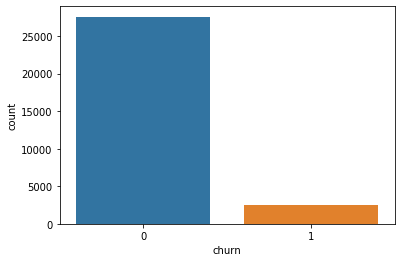

In [56]:
sns.countplot(x='churn', data= highvalueusers)

In [57]:

print("There are {} users tagged as churners out of {} High-Value Customers.".format(len(highvalueusers[highvalueusers.churn == 1]),highvalueusers.shape[0]))
print("High-value Churn Percentage : {}%".format(round(len(highvalueusers[highvalueusers.churn == 1])/highvalueusers.shape[0] *100,2)))


There are 2441 users tagged as churners out of 30001 High-Value Customers.
High-value Churn Percentage : 8.14%


###### For the analysis purpose lets comine all the incoming and outgoing minutes of usage for every month i,e 6,7,8 and plot to observe the patterns between churn and non churn

In [58]:
#Creating new feature: og_to_ic_mou_6, og_to_ic_mou_7, og_to_ic_mou_8
for i in range(6,9):
    highvalueusers['og_to_ic_mou_'+str(i)] = (highvalueusers['total_og_mou_'+str(i)])/(highvalueusers['total_ic_mou_'+str(i)]+1)

#### The below helper function will be used for plotting the line graph for churn vs Non-Churn for every month

In [59]:
def plotchurn(data,col):
    # per month churn vs Non-Churn
    fig, ax = plt.subplots(figsize=(7,4))
    colList=list(data.filter(regex=(col)).columns)
    colList = colList[:3]
    plt.plot(highvalueusers.groupby('churn')[colList].mean().T)
    ax.set_xticklabels(['Jun','Jul','Aug'])
    ## Add legend
    plt.legend(['Non-Churn', 'Churn'])
    # Add titles
    plt.title( "Month v/s "+str(col) , loc='Center', fontsize=16, fontweight=0, color='Black')
    plt.xlabel("Month")
    plt.ylabel(col)
    plt.show()
    # Numeric stats for per month churn vs Non-Churn
    return highvalueusers.groupby('churn')[colList].mean()

###### Ploting churn vs non churn based on total minutes of usage for every  month

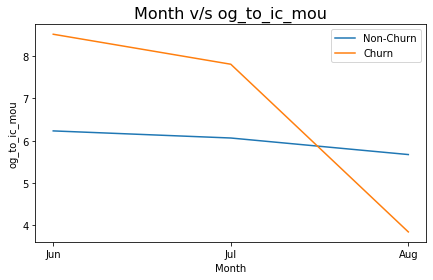

,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8
churn,,,
0,6.232771,6.064684,5.673024
1,8.520248,7.810618,3.842356


In [60]:
plotchurn(highvalueusers,'og_to_ic_mou')

###### Its clearly seen from the above plot that churn customers average usage went down during the month of 8 which is the action clearly this can be a good predictor for the churn customers

###### Ploting churn vs non churn based on data usage  for every  month

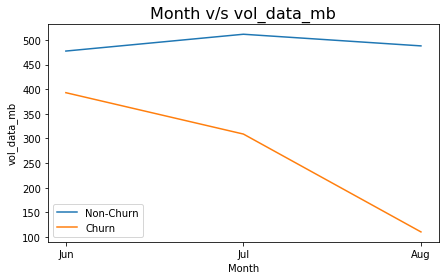

,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8
churn,,,
0,477.396226,511.506894,487.874238
1,392.945514,309.012290,110.481770


In [61]:
plotchurn(highvalueusers,'vol_data_mb')

###### Clearly its seen from the above that data usage is less for churners compared to first two months this clearly can be a good predictor

###### Ploting churn vs non churn based on maximum recharge amount  for every  month

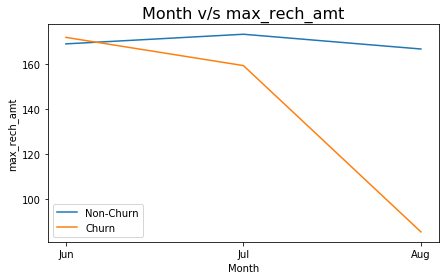

,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
churn,,,
0,169.049456,173.336575,166.767199
1,171.942237,159.388775,85.370750


In [62]:
plotchurn(highvalueusers,'max_rech_amt')

###### maximum recharge amount also drops significantly for churners from 2 month

###### Ploting churn vs non churn based on average revenue for user  for every  month

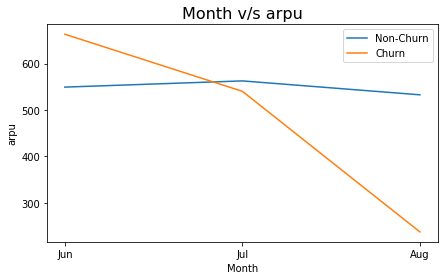

,arpu_6,arpu_7,arpu_8
churn,,,
0,549.220390,562.608191,532.635710
1,663.158246,540.165968,237.200793


In [63]:
plotchurn(highvalueusers,'arpu')

###### Average revenue per user is also dropping for churn cutomers in month eight

###### Lets combine all the incoming and outcoming minutes of usage for all local,roaming months as  Total_loc_mou_6, Total_loc_mou_7, Total_loc_mou_8


In [64]:
#Create new feature: Total_loc_mou_6,Total_loc_mou_7,lTotal_loc_mou_8
for i in range(6,9):
    highvalueusers['Total_loc_mou_'+str(i)] = (highvalueusers['loc_og_mou_'+str(i)])+(highvalueusers['loc_ic_mou_'+str(i)])

##### Churn vs Non Churn for all local mou


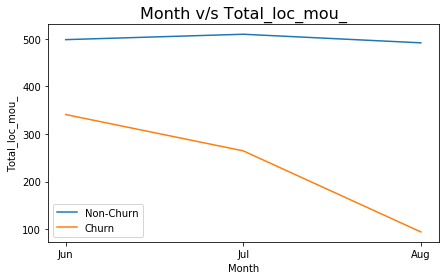

,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8
churn,,,
0,498.038143,509.358022,491.312215
1,340.671422,264.356186,94.092556


In [65]:
plotchurn(highvalueusers,'Total_loc_mou_')

##### local minutes of usage is low for churn cutsomers in action month

In [66]:
#Create new feature: Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
for i in range(6,9):
    highvalueusers['Total_roam_mou_'+str(i)] = (highvalueusers['roam_ic_mou_'+str(i)])+(highvalueusers['roam_og_mou_'+str(i)])

##### Plotting Churn vs Non Churn for roaming minutes of usage

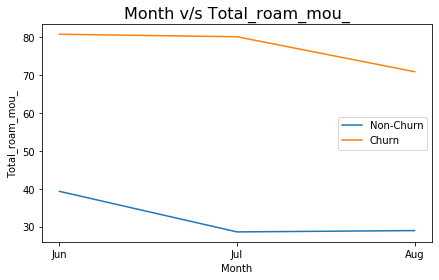

,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
churn,,,
0,39.309139,28.604839,28.955369
1,80.761930,80.098779,70.875625


In [67]:
plotchurn(highvalueusers,'Total_roam_mou_')

## WOW
######  The roaming usage of churners is way higher than those of non-churners across all months possible point would be People who are making/reciving more roaming calls during their tenure are more likely to churn.


In [68]:
#highvalueusers.isnull().sum()

# Modelling

## 5.Applying Logistic Regression with feature selection(without PCA)

take backup 

In [69]:
churnlg=highvalueusers.copy()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

In [71]:
# Putting feature variable to X
X = churnlg.drop(['churn'], axis=1)
X.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,vol_data_mb_6,vol_data_mb_7,vol_data_mb_8,avg_rech_amt_6,avg_rech_amt_7,avg_rech_amt_8,total_rech_num_data_6,total_rech_num_data_7,total_rech_num_data_8,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_month_rech_6,total_month_rech_7,total_month_rech_8,og_to_ic_mou_6,og_to_ic_mou_7,og_to_ic_mou_8,Total_loc_mou_6,Total_loc_mou_7,Total_loc_mou_8,Total_roam_mou_6,Total_roam_mou_7,Total_roam_mou_8
0,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,113,152,115,72.40,63.00,84.00,1,1,1,252.0,252.0,252.0,614.0,504.0,504.0,0.000000,0.000000,0.000000,0.00,0.00,5.44,0.00,0.00,0.0
1,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121

In [72]:
# Putting response variable to y
y = churnlg['churn']

y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int64

In [73]:
# Splitting the data into train and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [74]:
scaler = StandardScaler()


In [75]:
col=X_train.columns

In [76]:
#col

In [77]:
# fitting and transforming the scaler on train
X_train[col] = scaler.fit_transform(X_train[col])
# transforming the train using the already fit scaler
#X_test = scaler.transform(X_test)

In [78]:
# Logistic regression model
#logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
#logm1.fit().summary()

In [79]:
X_train.isnull().sum()

loc_og_t2o_mou           0
std_og_t2o_mou           0
loc_ic_t2o_mou           0
arpu_6                   0
arpu_7                   0
arpu_8                   0
onnet_mou_6              0
onnet_mou_7              0
onnet_mou_8              0
offnet_mou_6             0
offnet_mou_7             0
offnet_mou_8             0
roam_ic_mou_6            0
roam_ic_mou_7            0
roam_ic_mou_8            0
roam_og_mou_6            0
roam_og_mou_7            0
roam_og_mou_8            0
loc_og_t2t_mou_6         0
loc_og_t2t_mou_7         0
loc_og_t2t_mou_8         0
loc_og_t2m_mou_6         0
loc_og_t2m_mou_7         0
loc_og_t2m_mou_8         0
loc_og_t2f_mou_6         0
loc_og_t2f_mou_7         0
loc_og_t2f_mou_8         0
loc_og_t2c_mou_6         0
loc_og_t2c_mou_7         0
loc_og_t2c_mou_8         0
loc_og_mou_6             0
loc_og_mou_7             0
loc_og_mou_8             0
std_og_t2t_mou_6         0
std_og_t2t_mou_7         0
std_og_t2t_mou_8         0
std_og_t2m_mou_6         0
s

In [80]:
logreg = LogisticRegression()
rfe = RFE(logreg, 25)   # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)    

In [81]:
rfe.support_

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 160),
 ('std_og_t2o_mou', False, 159),
 ('loc_ic_t2o_mou', False, 158),
 ('arpu_6', True, 1),
 ('arpu_7', False, 8),
 ('arpu_8', False, 7),
 ('onnet_mou_6', False, 85),
 ('onnet_mou_7', False, 6),
 ('onnet_mou_8', False, 4),
 ('offnet_mou_6', False, 138),
 ('offnet_mou_7', False, 90),
 ('offnet_mou_8', False, 18),
 ('roam_ic_mou_6', False, 81),
 ('roam_ic_mou_7', False, 134),
 ('roam_ic_mou_8', False, 119),
 ('roam_og_mou_6', False, 140),
 ('roam_og_mou_7', False, 53),
 ('roam_og_mou_8', False, 65),
 ('loc_og_t2t_mou_6', False, 82),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', False, 80),
 ('loc_og_t2m_mou_6', False, 128),
 ('loc_og_t2m_mou_7', False, 132),
 ('loc_og_t2m_mou_8', False, 38),
 ('loc_og_t2f_mou_6', False, 73),
 ('loc_og_t2f_mou_7', False, 133),
 ('loc_og_t2f_mou_8', False, 72),
 ('loc_og_t2c_mou_6', False, 49),
 ('loc_og_t2c_mou_7', False, 110),
 ('loc_og_t2c_mou_8', False, 75),
 ('loc_og_mou_6', False, 149),
 ('loc_og_mou_7', False, 13

In [83]:
col = X_train.columns[rfe.support_]

In [84]:
X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_7',
       'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7',
       ...
       'total_month_rech_6', 'total_month_rech_7', 'total_month_rech_8',
       'og_to_ic_mou_6', 'og_to_ic_mou_7', 'Total_loc_mou_6',
       'Total_loc_mou_7', 'Total_roam_mou_6', 'Total_roam_mou_7',
       'Total_roam_mou_8'],
      dtype='object', length=159)

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20974
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3915.7
Date:                Sun, 30 Aug 2020   Deviance:                       7831.4
Time:                        09:36:52   Pearson chi2:                 5.46e+11
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2288      0.077    -54.661      0.000      -4.380      -4.077
arpu_6                 0.3092      0.031      9.964      0.000       0.248       0.370
loc_og_t2t_mou_7       0.2466      0.067      3.673      0.000       0.115       0.378
std_og_mou_7           0.2510      0.039      6.499      0.000       0.175       0.327
total_og_mou_8        -0.6797      0.087     -7.771      0.000      -0.851      -0.508
loc_ic_t2m_mou_7       0.4806      0.064      7.524      0.000       0.355       0.606
loc_ic_t2m_mou_8      -0.3577      0.321     -1.116      0.265      -0.986       0.271
loc_ic_mou_8          -0.9256      0.409     -2.264      0.024      -1.727      -0.124
total_ic_mou_8        -0.5738      0.172     -3.332      0.001      -0.911      -0.236
spl_ic_mou_8          -0.3616      0.062     -5.872      0.000      -0.482      -0.241
total_rech_num_8      -0.4705      0.060     -7.874      0.000      -0.588      -0.353
max_rech_amt_8         0.3481      0.074      4.727      0.000       0.204       0.492
last_day_rch_amt_8    -0.2716      0.060     -4.546      0.000      -0.389      -0.155
total_rech_data_8     -0.3872      0.092     -4.218      0.000      -0.567      -0.207
max_rech_data_8       -0.3092      0.095     -3.267      0.001      -0.495      -0.124
vol_2g_mb_8           -0.3542      0.098     -3.632      0.000      -0.545      -0.163
arpu_2g_7              0.3196      0.072      4.459      0.000       0.179       0.460
arpu_2g_8              0.3384      0.093      3.623      0.000       0.155       0.521
monthly_3g_7          -0.2699      0.073     -3.677      0.000      -0.414      -0.126
fb_user_8             -0.3602      0.071     -5.093      0.000      -0.499      -0.222
aon                   -0.2238      0.038     -5.904      0.000      -0.298      -0.149
vbc_3g_8              -0.2648      0.073     -3.625      0.000      -0.408      -0.122
vol_data_mb_8         -0.2259      0.088     -2.554      0.011      -0.399      -0.053
avg_rech_amt_8        -0.4989      0.094     -5.303      0.000      -0.683      -0.314
og_to_ic_mou_8        -0.3701      0.145     -2.554      0.011      -0.654      -0.086
Total_loc_mou_8       -0.9272      0.226     -4.105      0.000      -1.370      -0.485
======================================================================================
"""

In [86]:
#droping loc_ic_t2m_mou_8 due to high p value
col = col.drop('loc_ic_t2m_mou_8', 1)

In [87]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20975
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3916.3
Date:                Sun, 30 Aug 2020   Deviance:                       7832.6
Time:                        09:44:48   Pearson chi2:                 5.81e+11
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.2357      0.077    -54.752      0.000      -4.387      -4.084
arpu_6                 0.3099      0.031      9.980      0.000       0.249       0.371
loc_og_t2t_mou_7       0.2598      0.066      3.930      0.000       0.130       0.389
std_og_mou_7           0.2518      0.039      6.516      0.000       0.176       0.327
total_og_mou_8        -0.6797      0.087     -7.768      0.000      -0.851      -0.508
loc_ic_t2m_mou_7       0.4600      0.061      7.577      0.000       0.341       0.579
loc_ic_mou_8          -1.2462      0.298     -4.186      0.000      -1.830      -0.663
total_ic_mou_8        -0.5707      0.172     -3.317      0.001      -0.908      -0.233
spl_ic_mou_8          -0.3619      0.062     -5.879      0.000      -0.483      -0.241
total_rech_num_8      -0.4730      0.060     -7.921      0.000      -0.590      -0.356
max_rech_amt_8         0.3491      0.074      4.733      0.000       0.205       0.494
last_day_rch_amt_8    -0.2714      0.060     -4.536      0.000      -0.389      -0.154
total_rech_data_8     -0.3880      0.092     -4.228      0.000      -0.568      -0.208
max_rech_data_8       -0.3095      0.095     -3.271      0.001      -0.495      -0.124
vol_2g_mb_8           -0.3536      0.097     -3.629      0.000      -0.545      -0.163
arpu_2g_7              0.3198      0.072      4.460      0.000       0.179       0.460
arpu_2g_8              0.3385      0.093      3.628      0.000       0.156       0.521
monthly_3g_7          -0.2701      0.073     -3.679      0.000      -0.414      -0.126
fb_user_8             -0.3599      0.071     -5.089      0.000      -0.498      -0.221
aon                   -0.2225      0.038     -5.877      0.000      -0.297      -0.148
vbc_3g_8              -0.2646      0.073     -3.622      0.000      -0.408      -0.121
vol_data_mb_8         -0.2262      0.088     -2.558      0.011      -0.400      -0.053
avg_rech_amt_8        -0.4990      0.094     -5.287      0.000      -0.684      -0.314
og_to_ic_mou_8        -0.3713      0.145     -2.561      0.010      -0.655      -0.087
Total_loc_mou_8       -0.9427      0.225     -4.181      0.000      -1.385      -0.501
======================================================================================
"""

In [88]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,loc_ic_mou_8,9.91
23,Total_loc_mou_8,8.46
21,avg_rech_amt_8,5.44
6,total_ic_mou_8,5.32
14,arpu_2g_7,4.96
12,max_rech_data_8,4.40
9,max_rech_amt_8,4.26
3,total_og_mou_8,4.23
16,monthly_3g_7,4.00
20,vol_data_mb_8,3.99


In [89]:
#droping loc_ic_mou_8 due to high vif value
col = col.drop('loc_ic_mou_8', 1)

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
22,Total_loc_mou_8,5.47
20,avg_rech_amt_8,5.44
13,arpu_2g_7,4.96
11,max_rech_data_8,4.40
8,max_rech_amt_8,4.26
15,monthly_3g_7,4.00
19,vol_data_mb_8,3.99
14,arpu_2g_8,3.86
3,total_og_mou_8,3.81
16,fb_user_8,2.90


In [91]:
#droping loc_ic_mou_8 due to high vif value
col = col.drop('Total_loc_mou_8', 1)

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
20,avg_rech_amt_8,5.44
13,arpu_2g_7,4.96
11,max_rech_data_8,4.40
8,max_rech_amt_8,4.25
15,monthly_3g_7,4.00
19,vol_data_mb_8,3.99
14,arpu_2g_8,3.86
16,fb_user_8,2.90
3,total_og_mou_8,2.89
9,last_day_rch_amt_8,2.66


In [93]:
#droping avg_rech_amt_8 due to high vif value
col = col.drop('avg_rech_amt_8', 1)

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,arpu_2g_7,4.96
11,max_rech_data_8,4.39
15,monthly_3g_7,4.00
19,vol_data_mb_8,3.99
14,arpu_2g_8,3.85
16,fb_user_8,2.89
3,total_og_mou_8,2.81
8,max_rech_amt_8,2.54
2,std_og_mou_7,2.21
9,last_day_rch_amt_8,2.13


In [95]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20978
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3979.3
Date:                Sun, 30 Aug 2020   Deviance:                       7958.6
Time:                        09:45:37   Pearson chi2:                 4.59e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0911      0.071    -57.413      0.000      -4.231      -3.951
arpu_6                 0.3142      0.035      9.069      0.000       0.246       0.382
loc_og_t2t_mou_7       0.0880      0.054      1.644      0.100      -0.017       0.193
std_og_mou_7           0.3406      0.038      8.981      0.000       0.266       0.415
total_og_mou_8        -0.9287      0.085    -10.862      0.000      -1.096      -0.761
loc_ic_t2m_mou_7       0.3361      0.058      5.829      0.000       0.223       0.449
total_ic_mou_8        -2.1902      0.138    -15.919      0.000      -2.460      -1.921
spl_ic_mou_8          -0.3472      0.061     -5.656      0.000      -0.467      -0.227
total_rech_num_8      -0.4413      0.059     -7.448      0.000      -0.557      -0.325
max_rech_amt_8         0.0531      0.051      1.047      0.295      -0.046       0.152
last_day_rch_amt_8    -0.4209      0.060     -6.964      0.000      -0.539      -0.302
total_rech_data_8     -0.3904      0.092     -4.239      0.000      -0.571      -0.210
max_rech_data_8       -0.3068      0.096     -3.207      0.001      -0.494      -0.119
vol_2g_mb_8           -0.3375      0.097     -3.494      0.000      -0.527      -0.148
arpu_2g_7              0.3303      0.071      4.632      0.000       0.191       0.470
arpu_2g_8              0.3113      0.094      3.313      0.001       0.127       0.496
monthly_3g_7          -0.2753      0.073     -3.757      0.000      -0.419      -0.132
fb_user_8             -0.3675      0.071     -5.145      0.000      -0.508      -0.228
aon                   -0.2649      0.037     -7.072      0.000      -0.338      -0.191
vbc_3g_8              -0.2689      0.073     -3.684      0.000      -0.412      -0.126
vol_data_mb_8         -0.2295      0.092     -2.494      0.013      -0.410      -0.049
og_to_ic_mou_8        -0.3705      0.145     -2.554      0.011      -0.655      -0.086
======================================================================================
"""

In [97]:
#droping max_rech_amt_8 due to high vif value
col = col.drop('max_rech_amt_8', 1)

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,arpu_2g_7,4.96
10,max_rech_data_8,4.19
14,monthly_3g_7,4.00
18,vol_data_mb_8,3.99
13,arpu_2g_8,3.85
15,fb_user_8,2.88
3,total_og_mou_8,2.77
2,std_og_mou_7,2.21
9,total_rech_data_8,1.97
5,total_ic_mou_8,1.83


In [99]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20979
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3979.8
Date:                Sun, 30 Aug 2020   Deviance:                       7959.7
Time:                        09:50:41   Pearson chi2:                 4.73e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0815      0.070    -57.965      0.000      -4.220      -3.944
arpu_6                 0.3193      0.034      9.286      0.000       0.252       0.387
loc_og_t2t_mou_7       0.0871      0.053      1.628      0.104      -0.018       0.192
std_og_mou_7           0.3403      0.038      8.974      0.000       0.266       0.415
total_og_mou_8        -0.9194      0.085    -10.833      0.000      -1.086      -0.753
loc_ic_t2m_mou_7       0.3345      0.058      5.805      0.000       0.222       0.447
total_ic_mou_8        -2.1721      0.136    -15.954      0.000      -2.439      -1.905
spl_ic_mou_8          -0.3465      0.061     -5.649      0.000      -0.467      -0.226
total_rech_num_8      -0.4428      0.059     -7.490      0.000      -0.559      -0.327
last_day_rch_amt_8    -0.3940      0.056     -7.066      0.000      -0.503      -0.285
total_rech_data_8     -0.3907      0.092     -4.242      0.000      -0.571      -0.210
max_rech_data_8       -0.2897      0.094     -3.079      0.002      -0.474      -0.105
vol_2g_mb_8           -0.3370      0.097     -3.483      0.000      -0.527      -0.147
arpu_2g_7              0.3328      0.071      4.673      0.000       0.193       0.472
arpu_2g_8              0.3150      0.094      3.340      0.001       0.130       0.500
monthly_3g_7          -0.2773      0.073     -3.792      0.000      -0.421      -0.134
fb_user_8             -0.3686      0.071     -5.160      0.000      -0.509      -0.229
aon                   -0.2617      0.037     -7.010      0.000      -0.335      -0.189
vbc_3g_8              -0.2662      0.073     -3.651      0.000      -0.409      -0.123
vol_data_mb_8         -0.2333      0.091     -2.557      0.011      -0.412      -0.054
og_to_ic_mou_8        -0.3622      0.144     -2.511      0.012      -0.645      -0.080
======================================================================================
"""

In [100]:
#droping loc_og_t2t_mou_7 due to high p value
col = col.drop('loc_og_t2t_mou_7', 1)

In [101]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,arpu_2g_7,4.96
9,max_rech_data_8,4.19
13,monthly_3g_7,4.00
17,vol_data_mb_8,3.99
12,arpu_2g_8,3.85
14,fb_user_8,2.88
2,total_og_mou_8,2.37
1,std_og_mou_7,2.00
8,total_rech_data_8,1.97
4,total_ic_mou_8,1.82


In [102]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20980
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3981.0
Date:                Sun, 30 Aug 2020   Deviance:                       7962.1
Time:                        09:51:23   Pearson chi2:                 5.31e+10
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -4.0836      0.070    -58.018      0.000      -4.222      -3.946
arpu_6                 0.3228      0.034      9.442      0.000       0.256       0.390
std_og_mou_7           0.3351      0.038      8.869      0.000       0.261       0.409
total_og_mou_8        -0.9040      0.084    -10.720      0.000      -1.069      -0.739
loc_ic_t2m_mou_7       0.3411      0.057      5.948      0.000       0.229       0.454
total_ic_mou_8        -2.1580      0.136    -15.898      0.000      -2.424      -1.892
spl_ic_mou_8          -0.3486      0.061     -5.680      0.000      -0.469      -0.228
total_rech_num_8      -0.4459      0.059     -7.542      0.000      -0.562      -0.330
last_day_rch_amt_8    -0.3964      0.056     -7.121      0.000      -0.506      -0.287
total_rech_data_8     -0.3888      0.092     -4.226      0.000      -0.569      -0.208
max_rech_data_8       -0.2886      0.094     -3.068      0.002      -0.473      -0.104
vol_2g_mb_8           -0.3378      0.097     -3.489      0.000      -0.528      -0.148
arpu_2g_7              0.3325      0.071      4.667      0.000       0.193       0.472
arpu_2g_8              0.3151      0.094      3.340      0.001       0.130       0.500
monthly_3g_7          -0.2780      0.073     -3.801      0.000      -0.421      -0.135
fb_user_8             -0.3716      0.071     -5.204      0.000      -0.512      -0.232
aon                   -0.2605      0.037     -6.982      0.000      -0.334      -0.187
vbc_3g_8              -0.2669      0.073     -3.659      0.000      -0.410      -0.124
vol_data_mb_8         -0.2345      0.091     -2.565      0.010      -0.414      -0.055
og_to_ic_mou_8        -0.3662      0.145     -2.530      0.011      -0.650      -0.083
======================================================================================
"""

In [103]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

11785    0.056134
11987    0.006844
11648    0.031529
12890    0.000020
3762     0.007703
10072    0.010981
15584    0.000394
5067     0.002612
16450    0.039014
10103    0.056645
dtype: float64

In [104]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([5.61338808e-02, 6.84403796e-03, 3.15291667e-02, 2.04784852e-05,
       7.70251464e-03, 1.09808414e-02, 3.93599983e-04, 2.61206292e-03,
       3.90141528e-02, 5.66445771e-02])

In [105]:
#Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.056134,11785
1,0,0.006844,11987
2,0,0.031529,11648
3,0,0.000020,12890
4,0,0.007703,3762


In [106]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.056134,11785,0
1,0,0.006844,11987,0
2,0,0.031529,11648,0
3,0,0.000020,12890,0
4,0,0.007703,3762,0


In [107]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[19112   197]
 [ 1274   417]]


In [108]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.929952380952381


In [109]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

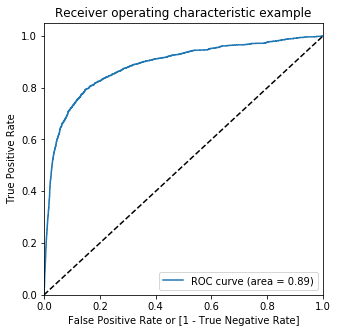

In [111]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.056134,11785,0,1,0,0,0,0,0,0,0,0,0
1,0,0.006844,11987,0,1,0,0,0,0,0,0,0,0,0
2,0,0.031529,11648,0,1,0,0,0,0,0,0,0,0,0
3,0,0.000020,12890,0,1,0,0,0,0,0,0,0,0,0
4,0,0.007703,3762,0,1,0,0,0,0,0,0,0,0,0


In [113]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.836571  0.798936  0.839867
0.2   0.2  0.905000  0.678297  0.924854
0.3   0.3  0.926143  0.591366  0.955461
0.4   0.4  0.933857  0.444116  0.976747
0.5   0.5  0.929952  0.246600  0.989798
0.6   0.6  0.924667  0.104672  0.996478
0.7   0.7  0.921857  0.046127  0.998550
0.8   0.8  0.920571  0.018924  0.999534
0.9   0.9  0.919714  0.004140  0.999896


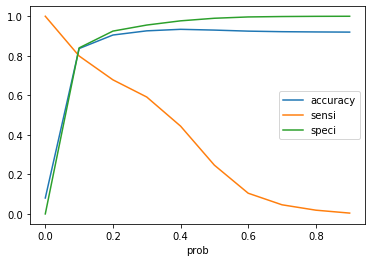

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [115]:
###### From the curve above, 0.1 is the optimum point to take it as a cutoff probability.

In [116]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.056134,11785,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.006844,11987,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.031529,11648,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000020,12890,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.007703,3762,0,1,0,0,0,0,0,0,0,0,0,0


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8365714285714285

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16217,  3092],
       [  340,  1351]], dtype=int64)

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7989355410999409

#### Lets Predict on test set

In [121]:
colt=X_test.columns
colt

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'total_month_rech_8', 'og_to_ic_mou_6', 'og_to_ic_mou_7',
       'og_to_ic_mou_8', 'Total_loc_mou_6', 'Total_loc_mou_7',
       'Total_loc_mou_8', 'Total_roam_mou_6', 'Total_roam_mou_7',
       'Total_roam_mou_8'],
      dtype='object', length=184)

In [122]:
##scale and transform the test set with 
X_test[colt] = scaler.transform(X_test[colt])

In [123]:
#X_train_sm = sm.add_constant(X_train[col])

In [124]:
X_test_sm = sm.add_constant(X_test[col])

In [125]:
y_test_pred = res.predict(X_test_sm)

In [126]:
y_test_pred[:10]

6102     0.252041
2539     0.089164
21576    0.014057
19574    0.055536
12804    0.458094
24030    0.006270
20273    0.031915
7538     0.009938
3196     0.007063
12935    0.023183
dtype: float64

In [127]:
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

,Churn,Churn_Prob,CustID
6102,1,0.252041,6102
2539,1,0.089164,2539
21576,0,0.014057,21576
19574,0,0.055536,19574
12804,1,0.458094,12804


In [128]:
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.1 else 0)

In [129]:
y_test_pred_final.head()

,Churn,Churn_Prob,CustID,final_predicted
6102,1,0.252041,6102,1
2539,1,0.089164,2539,0
21576,0,0.014057,21576,0
19574,0,0.055536,19574,0
12804,1,0.458094,12804,1


In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.final_predicted)

0.8451283190756582

In [131]:
confusion2 = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.final_predicted )
confusion2

array([[6998, 1253],
       [ 141,  609]], dtype=int64)

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7989355410999409

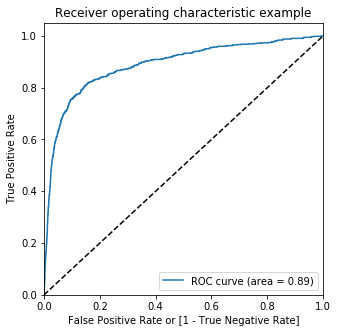

In [133]:
draw_roc(y_test_pred_final.Churn, y_test_pred_final.Churn_Prob)

###### Logistic regression (without PCA ) with optimal cutoff is giving decent values

###### Train Accuracy:83.65%  Train Sensivity: 79.89%
###### Test Acurracy :84.51%  Test Sensivity :79.89%

## 6.PCA and Class Imbalance

In [134]:
# creating copy of the final highvalueusers_PCA dataframe
highvalueusers_PCA = highvalueusers.copy()


In [135]:
from sklearn.model_selection import train_test_split

#putting features variables in X
X = highvalueusers_PCA.drop(['churn'], axis=1)

#putting response variables in Y
y = highvalueusers_PCA['churn']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [136]:
#Rescaling the features before PCA as it is sensitive to the scales of the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [137]:
# fitting and transforming the scaler on train
X_train = scaler.fit_transform(X_train)
# transforming the train using the already fit scaler
X_test = scaler.transform(X_test)

###### Handling class imbalance.
###### Most machine learning algorithms work best when the number of samples in each class are about equal.When observation in one class is higher than the observation in other classes then there exists a class imbalance.This is because most algorithms are designed to maximize accuracy and reduce errors
###### Class Imbalance is a common problem in machine learning, especially in classification problems. Imbalance data can hamper our model accuracy big time.

###### Resampling Technique
###### A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).

###### SMOTE
###### SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
###### ADASYN
###### Its a improved version of Smote. What it does is same as SMOTE just with a minor improvement. After creating those sample it adds a random small values to the points thus making it more realistic. In other words instead of all the sample being linearly correlated to the parent they have a little more variance in them i.e they are bit scattered.

###### -----------------------------------------------------------------------------------------------------------------------

###### Note

###### We are facing errors running the SMOTE below for class imbalance.I have tried debugging by taking inputs from the discusion forum.Unable to debugg the error.We have upgraded sklearn to the latest version.Installed  imbalance learn.After spending some ample time on debugging this.We are going ahead with actual train and test splits.Passing the argument class_weight='balanced' to mitigate this. .

###### -----------------------------------------------------------------------------------------------------------------------

In [138]:
### from imblearn.over_sampling import SMOTE
### sm = SMOTE(random_state=12)
### X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [139]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state=12, ratio = 1)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

In [140]:
#Importing the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [141]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [142]:
pca.explained_variance_ratio_

array([5.44446694e-01, 8.70538185e-02, 6.46815724e-02, 5.24450460e-02,
       2.88779395e-02, 2.72540394e-02, 2.25376813e-02, 1.97065497e-02,
       1.78709791e-02, 1.05069745e-02, 9.40912746e-03, 7.62981561e-03,
       7.01230709e-03, 6.86134143e-03, 5.58476006e-03, 4.86811718e-03,
       4.57118983e-03, 4.31631453e-03, 4.14312995e-03, 3.72487606e-03,
       3.57839782e-03, 3.33001532e-03, 3.17308938e-03, 2.90278332e-03,
       2.84797450e-03, 2.79936266e-03, 2.56998253e-03, 2.33843120e-03,
       2.21356927e-03, 2.19656197e-03, 2.03074835e-03, 1.83970522e-03,
       1.69323390e-03, 1.61840368e-03, 1.51871009e-03, 1.45262261e-03,
       1.32780103e-03, 1.30192889e-03, 1.18359072e-03, 1.16783011e-03,
       1.00903374e-03, 9.07191120e-04, 8.78444175e-04, 8.45351230e-04,
       8.11285335e-04, 7.28708641e-04, 7.03190698e-04, 6.50939563e-04,
       6.23803855e-04, 6.07275431e-04, 5.85291992e-04, 5.75337206e-04,
       5.65166500e-04, 5.44374727e-04, 5.37848375e-04, 5.29593675e-04,
      

In [143]:
pca.explained_variance_ratio_[:50]

array([0.54444669, 0.08705382, 0.06468157, 0.05244505, 0.02887794,
       0.02725404, 0.02253768, 0.01970655, 0.01787098, 0.01050697,
       0.00940913, 0.00762982, 0.00701231, 0.00686134, 0.00558476,
       0.00486812, 0.00457119, 0.00431631, 0.00414313, 0.00372488,
       0.0035784 , 0.00333002, 0.00317309, 0.00290278, 0.00284797,
       0.00279936, 0.00256998, 0.00233843, 0.00221357, 0.00219656,
       0.00203075, 0.00183971, 0.00169323, 0.0016184 , 0.00151871,
       0.00145262, 0.0013278 , 0.00130193, 0.00118359, 0.00116783,
       0.00100903, 0.00090719, 0.00087844, 0.00084535, 0.00081129,
       0.00072871, 0.00070319, 0.00065094, 0.0006238 , 0.00060728])

In [144]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

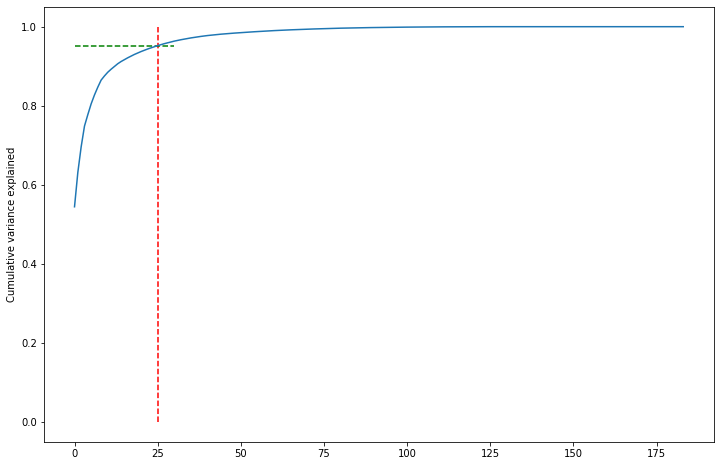

In [145]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=25, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

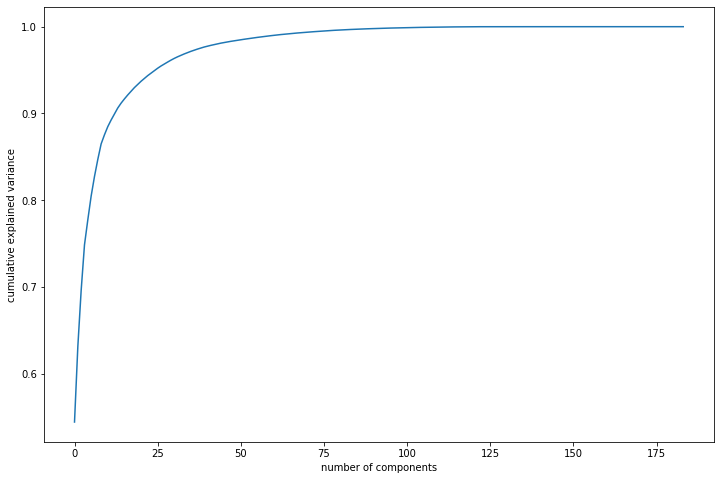

In [146]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

###### 25 components can define the variance by more than 95%

In [147]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=25)

In [148]:
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(21000, 25)

In [149]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.00839952, 0.00909942,
        0.00767654],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00974718, 0.01410365,
        0.02718735],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### Correlation Matrix

In [150]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())

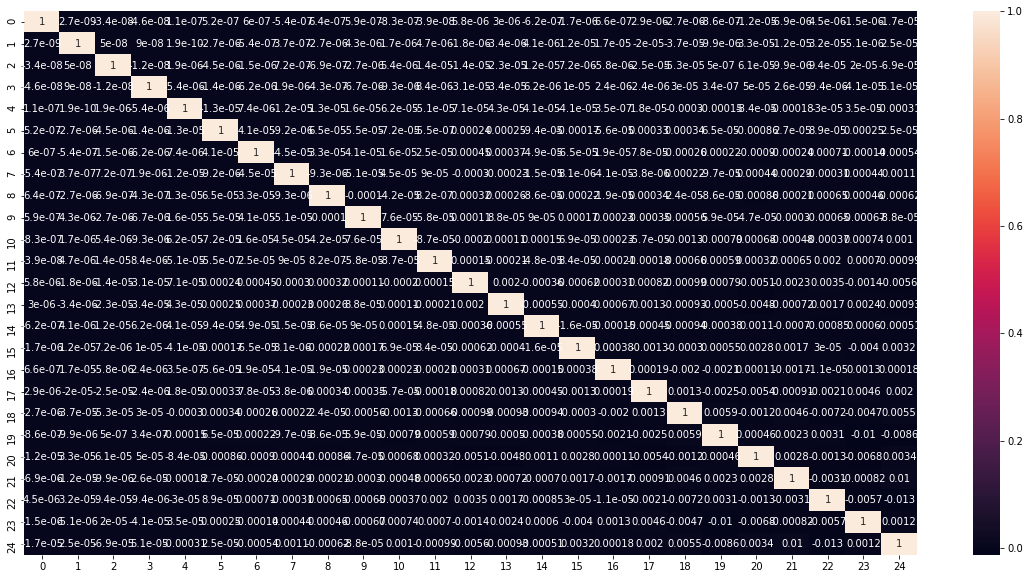

In [151]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [152]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.010420413144435592 , min corr:  -0.012589550493810539


In [153]:
#Applying selected components to the test data - 50 components
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 25)

## 7.Logistic Regression


###### Now lets do the Logistic Regression modeling with selected 25 pca feature
###### We also needs to do the class imbalance with class_weight = balanced

In [154]:
import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [155]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression(class_weight='balanced')
# model_pca = learner_pca.fit(X_train_pca,y_train)

###### We will define a function for fitting the model and returning  model fit metrics. This helper function defined will help us in the long run.As we will be performing various fits.


In [156]:
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.4g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

In [157]:
modelfit(learner_pca, X_train_pca, y_train)


Model Report
Accuracy : 0.7819
Recall/Sensitivity : 0.8025
AUC Score (Train): 0.856669
CV Score : Mean - 0.8531722 | Std - 0.007961009 | Min - 0.8426828 | Max - 0.8634311


##### Defining a helper function for confusion matrix metrics which is essential to check for  model metrics going forward for every model.

In [158]:
def getModelMetrics(actual_churn=False,pred_churn=False):

    confusion = metrics.confusion_matrix(actual_churn, pred_churn)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_churn,pred_churn)))
    #Let us print the accuracy
    print('accuracy : {}'.format(float(TP+TN)/ float(TP+FN+TN+FP)))
    # Let us calculate specificity
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual_churn, pred_churn )))

In [159]:
# predictions on Test data
pred_probs_test = learner_pca.predict(X_test_pca)
getModelMetrics(y_test,pred_probs_test)

Roc_auc_score : 0.7877719064355836
accuracy : 0.7675813798466837
Sensitivity/Recall : 0.812
Specificity: 0.7635438128711671
False Positive Rate: 0.23645618712883287
Positive predictive value: 0.237890625
Negative Predictive value: 0.9781089892873778
sklearn precision score value: 0.237890625


##### This function will take the probability cut-off defined and creates a data with churn	churn_Prob	final_predicted colunms 
 

In [160]:
def predictChurnWithProb(model,X,y,prob):
    # Funtion to predict the churn using the input probability cut-off
    # Input arguments: model instance, x and y to predict using model and cut-off probability
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'churn':y, 'churn_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Churn_Prob>x else 0
    y_df['final_predicted'] = y_df.churn_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    getModelMetrics(y_df.churn,y_df.final_predicted)
    return y_df

In [161]:
cut_off_prob=0.5
y_train_df = predictChurnWithProb(learner_pca,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.781945167696486
accuracy : 0.7647142857142857
Sensitivity/Recall : 0.8024837374334713
Specificity: 0.7614065979595007
False Positive Rate: 0.23859340204049925
Positive predictive value: 0.22753185781354796
Negative Predictive value: 0.9777866453844107
sklearn precision score value: 0.22753185781354796


,churn,churn_Prob,final_predicted
11785,0,0.377606,0
11987,0,0.178759,0
11648,0,0.467358,0
12890,0,0.415056,0
3762,0,0.118692,0


###### Plotting the ROC Curve : An ROC curve demonstrates several things:
###### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
###### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
###### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

###### Lets define a function for ROC curve which would be pretty useful in long run 

In [162]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

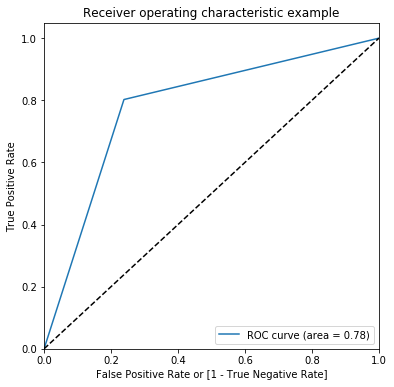

(array([0.       , 0.2385934, 1.       ]),
 array([0.        , 0.80248374, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [163]:
draw_roc(y_train_df.churn, y_train_df.final_predicted)

In [164]:
#draw_roc(y_pred_final.Churn, y_pred_final.predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(y_train_df.churn, y_train_df.final_predicted)))

roc_auc_score : 0.78


###### Finding Optimal Cutoff Point
###### Since recall or sensitivity is a much more important metrics for churn prediction. 
###### A trade off between sensitivity(or recall) and specificity is to be considered in doing so.
###### We will try adjusting the probability threshold which shall lead to higher sensitivity or recall rate.

###### Defining function for finding and defining the optimal cut off

In [165]:
def findOptimalCutoff(df):
    #Function to find the optimal cutoff for classifing as churn/non-churn
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.churn_Prob.map( lambda x: 1 if x > i else 0)
    #print(df.head())
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    # TP = confusion[1,1] # true positive 
    # TN = confusion[0,0] # true negatives
    # FP = confusion[0,1] # false positives
    # FN = confusion[1,0] # false negatives
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(df.churn, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()

     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.295095  0.982259  0.234916
0.2   0.2  0.455143  0.946186  0.412139
0.3   0.3  0.576810  0.918391  0.546895
0.4   0.4  0.675857  0.862803  0.659485
0.5   0.5  0.764714  0.802484  0.761407
0.6   0.6  0.834810  0.716736  0.845150
0.7   0.7  0.885619  0.599054  0.910715
0.8   0.8  0.914286  0.407451  0.958672
0.9   0.9  0.920571  0.114725  0.991144


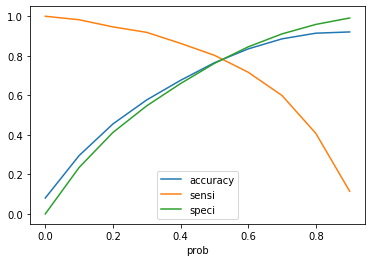

In [166]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(y_train_df)

###### From the curve above, 0.5 is the optimum point .
######  At this point there is a balance of sensitivity, specificity and accuracy.

In [167]:
# predicting with the choosen cut-off on train
cut_off_prob = 0.5
predictChurnWithProb(learner_pca,X_train_pca,y_train,cut_off_prob)

Roc_auc_score : 0.781945167696486
accuracy : 0.7647142857142857
Sensitivity/Recall : 0.8024837374334713
Specificity: 0.7614065979595007
False Positive Rate: 0.23859340204049925
Positive predictive value: 0.22753185781354796
Negative Predictive value: 0.9777866453844107
sklearn precision score value: 0.22753185781354796


,churn,churn_Prob,final_predicted
11785,0,0.377606,0
11987,0,0.178759,0
11648,0,0.467358,0
12890,0,0.415056,0
3762,0,0.118692,0
...,...,...,...
12119,0,0.385486,0
24423,0,0.113303,0
14147,0,0.727633,1
23320,0,0.654526,1


In [168]:
# predicting with the choosen cut-off on test
predictChurnWithProb(learner_pca,X_test_pca,y_test,cut_off_prob)

Roc_auc_score : 0.7877719064355836
accuracy : 0.7675813798466837
Sensitivity/Recall : 0.812
Specificity: 0.7635438128711671
False Positive Rate: 0.23645618712883287
Positive predictive value: 0.237890625
Negative Predictive value: 0.9781089892873778
sklearn precision score value: 0.237890625


,churn,churn_Prob,final_predicted
6102,1,0.688681,1
2539,1,0.501142,1
21576,0,0.415663,0
19574,0,0.434327,0
12804,1,0.683064,1
...,...,...,...
12109,0,0.404718,0
17866,0,0.028708,0
5658,0,0.010221,0
1434,0,0.431184,0


###### The resulting model, after PCA and logistic regression (with optimal cutoff setting) has a right balance of different metrics score for sensitivity, specificity and Roc Accuracy on the train and test set.

###### train sensitivity : 80.24%, train roc auc score : 78.19%
###### test sensitivity : 81.2%, test roc auc score : 78.77%

## 8.Descision Tree

###### Lets apply Decision Tree in our analysis
###### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning

In [515]:
dt0 = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=6,
                             random_state=10)
modelfit(dt0, X_train_pca, y_train)


Model Report
Accuracy : 0.7517
Recall/Sensitivity : 0.7611
AUC Score (Train): 0.822365
CV Score : Mean - 0.7790657 | Std - 0.01384024 | Min - 0.7658206 | Max - 0.8017675


In [516]:
# make predictions
pred_probs_test = dt0.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7328639760837069
accuracy : 0.7424730585490501
Sensitivity/Recall : 0.7213333333333334
Specificity: 0.7443946188340808
False Positive Rate: 0.2556053811659193
Positive predictive value: 0.20415094339622641
Negative Predictive value: 0.9670917965674697
sklearn precision score value: 0.20415094339622641


In [517]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': range(5,15,3),
    'min_samples_leaf': range(100, 400, 50),
    'min_samples_split': range(100, 400, 100),
    'max_features': [8,10,15]
}
# Create a based model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = 3, n_jobs = 4,verbose = 1,scoring="f1_weighted")

In [518]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    4.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   14.4s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   32.8s
[Parallel(n_jobs=4)]: Done 648 out of 648 | elapsed:   50.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=4,
             param_grid={'max_d

In [169]:
# printing the optimal accuracy score and hyperparameters
print('We can get recall of',grid_search.best_score_,'using',grid_search.best_params_)

We can get recall of 0.8252605355688797 using {'max_depth': 8, 'max_features': 15, 'min_samples_leaf': 300, 'min_samples_split': 100}


In [519]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=8,
                             min_samples_leaf=300, 
                             min_samples_split=100,
                             max_features=15,
                             random_state=10)

In [520]:
modelfit(dt_final,X_train_pca,y_train)


Model Report
Accuracy : 0.7672
Recall/Sensitivity : 0.7528
AUC Score (Train): 0.847181
CV Score : Mean - 0.8143618 | Std - 0.0094234 | Min - 0.7959534 | Max - 0.8205858


In [521]:
# make predictions
pred_probs_test = dt_final.predict(X_test_pca)
#Let's check the model metrices.
getModelMetrics(actual_churn=y_test,pred_churn=pred_probs_test)

Roc_auc_score : 0.7531041085928978
accuracy : 0.7773580713254082
Sensitivity/Recall : 0.724
Specificity: 0.7822082171857957
False Positive Rate: 0.21779178281420433
Positive predictive value: 0.23205128205128206
Negative Predictive value: 0.9689235850472901
sklearn precision score value: 0.23205128205128206


##### Desicion Tree results with the following 

##### Desicion Tree results
#####  Train roc: 84.71%    Trains sensivity:75.28%
#####  Test roc: 75.31%     Test sensivity: 72.4%   
    

###### Even after hyperparameter tuning for the Decision Tree. The recall rate is 72.4% which is not very significant to predict the churn.

###### Let's see if we can achive a better Recall rate by deciding an optimal cut-off for the model to predict churn.

In [522]:
# predicting churn with default cut-off 0.5
cut_off_prob = 0.5
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.767206710964963
accuracy : 0.7792857142857142
Sensitivity/Recall : 0.7528089887640449
Specificity: 0.7816044331658812
False Positive Rate: 0.21839556683411881
Positive predictive value: 0.23187613843351548
Negative Predictive value: 0.9730496453900709
sklearn precision score value: 0.23187613843351548


,churn,churn_Prob,final_predicted
11785,0,0.512455,1
11987,0,0.444980,0
11648,0,0.835835,1
12890,0,0.191712,0
3762,0,0.000000,0


     prob  accuracy     sensi     speci
0.0   0.0  0.164857  1.000000  0.091719
0.1   0.1  0.322333  0.992312  0.263659
0.2   0.2  0.462381  0.961561  0.418665
0.3   0.3  0.609762  0.908930  0.583562
0.4   0.4  0.622952  0.900059  0.598685
0.5   0.5  0.779286  0.752809  0.781604
0.6   0.6  0.827095  0.684211  0.839608
0.7   0.7  0.857952  0.592549  0.881195
0.8   0.8  0.895238  0.408634  0.937853
0.9   0.9  0.921190  0.116499  0.991662


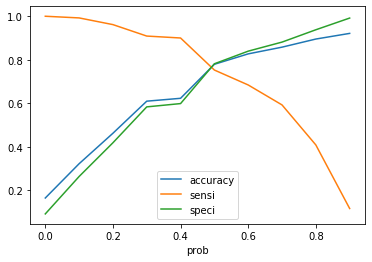

In [523]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [524]:
# predicting churn with cut-off 0.45
cut_off_prob=0.45
y_train_df = predictChurnWithProb(dt_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.7646138453773007
accuracy : 0.7249047619047619
Sensitivity/Recall : 0.8119455943228858
Specificity: 0.7172820964317158
False Positive Rate: 0.28271790356828425
Positive predictive value: 0.20096604215456673
Negative Predictive value: 0.9775550536420101
sklearn precision score value: 0.20096604215456673


,churn,churn_Prob,final_predicted
11785,0,0.512455,1
11987,0,0.444980,0
11648,0,0.835835,1
12890,0,0.191712,0
3762,0,0.000000,0


In [ ]:
#Lets see how it performs on test data.
y_test_df= predictChurnWithProb(dt_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

###### Decision tree after selecting optimal cut-off  is resulting in a model with
###### Train Recall : 81.19% and Train Roc_auc_score : 76.46%
###### Test Recall : 79.2% and Test Roc_auc_score : 75.46%


## 9.Random Forest

######  Applying Random Forest Classifier on our principal components with Hyperparameter tuning

###### Tuning max_depth

Let's try to find the optimum values for max_depth and understand how the value of max_depth impacts the overall accuracy of the ensemble.

In [556]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf0 = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rfgs = GridSearchCV(rf0, parameters, 
                    cv=5, 
                   scoring="accuracy",return_train_score=True)
rfgs.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [564]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.641615,0.069700,0.038691,0.001591,100,{'n_estimators': 100},0.854286,0.843095,0.854762,0.858095,0.835952,0.849238,0.008351,4,0.867917,0.869583,0.871786,0.867500,0.867738,0.868905,0.001617
1,19.632392,1.071399,0.232388,0.048652,500,{'n_estimators': 500},0.857381,0.843810,0.854048,0.856190,0.840238,0.850333,0.006961,2,0.869405,0.870536,0.868690,0.864286,0.868929,0.868369,0.002138
2,37.092439,4.061253,0.357547,0.012141,900,{'n_estimators': 900},0.858810,0.844762,0.853571,0.857143,0.836429,0.850143,0.008401,3,0.871964,0.870536,0.867798,0.866429,0.869940,0.869333,0.001976
3,48.236442,0.258447,0.507030,0.005467,1300,{'n_estimators': 1300},0.859048,0.844286,0.855238,0.857381,0.840000,0.851190,0.007607,1,0.870714,0.869940,0.868988,0.867440,0.870833,0.869583,0.001258


In [563]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()  

KeyError: 'param_max_depth'

<Figure size 432x288 with 0 Axes>

After 7 accuracy is going down

###### Tuning n_estimators

Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

In [560]:
# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf1 = RandomForestClassifier(max_depth=7,class_weight='balanced')


# fit tree on training data
rfgs = GridSearchCV(rf1, parameters, 
                    cv=5, 
                   scoring="accuracy",return_train_score=True)
rfgs.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [561]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.641615,0.069700,0.038691,0.001591,100,{'n_estimators': 100},0.854286,0.843095,0.854762,0.858095,0.835952,0.849238,0.008351,4,0.867917,0.869583,0.871786,0.867500,0.867738,0.868905,0.001617
1,19.632392,1.071399,0.232388,0.048652,500,{'n_estimators': 500},0.857381,0.843810,0.854048,0.856190,0.840238,0.850333,0.006961,2,0.869405,0.870536,0.868690,0.864286,0.868929,0.868369,0.002138
2,37.092439,4.061253,0.357547,0.012141,900,{'n_estimators': 900},0.858810,0.844762,0.853571,0.857143,0.836429,0.850143,0.008401,3,0.871964,0.870536,0.867798,0.866429,0.869940,0.869333,0.001976
3,48.236442,0.258447,0.507030,0.005467,1300,{'n_estimators': 1300},0.859048,0.844286,0.855238,0.857381,0.840000,0.851190,0.007607,1,0.870714,0.869940,0.868988,0.867440,0.870833,0.869583,0.001258


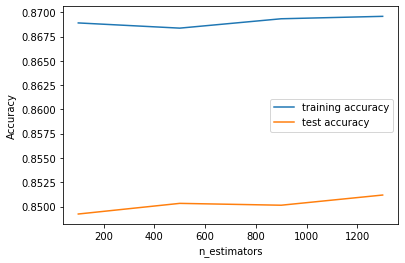

In [568]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###### clearly n_estimators =100

###### Tuning max_features

In [584]:
# instantiate the model (note we are specifying a max_depth)

parameters = {'max_features': [4, 8, 14, 20, 24]}
rf2 = RandomForestClassifier(n_estimators=100,max_depth=7,class_weight='balanced')


# fit tree on training data
rfgs = GridSearchCV(rf2, parameters, 
                    cv=5, 
                   scoring="accuracy",return_train_score=True)
rfgs.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [585]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.938331,0.015135,0.039480,0.002415,4,{'max_features': 4},0.855952,0.842857,0.851190,0.856429,0.840000,0.849286,0.006733,3,0.869643,0.871786,0.868214,0.866250,0.868988,0.868976,0.001808
1,5.537528,0.147288,0.040681,0.004867,8,{'max_features': 8},0.857143,0.845952,0.857857,0.857143,0.836429,0.850905,0.008488,1,0.869464,0.870714,0.871250,0.866667,0.867202,0.869060,0.001837
2,9.895161,0.491694,0.038882,0.002587,14,{'max_features': 14},0.857381,0.843571,0.854524,0.852143,0.840000,0.849524,0.006629,2,0.868810,0.867440,0.866131,0.864048,0.870952,0.867476,0.002342
3,15.071117,0.775406,0.039922,0.001666,20,{'max_features': 20},0.853571,0.838810,0.850238,0.842143,0.840238,0.845000,0.005832,4,0.865119,0.862857,0.861429,0.858393,0.868036,0.863167,0.003269
4,18.220205,1.291819,0.043690,0.001822,24,{'max_features': 24},0.848810,0.833810,0.848810,0.840952,0.836905,0.841857,0.006112,5,0.860179,0.857381,0.859881,0.856488,0.863452,0.859476,0.002441


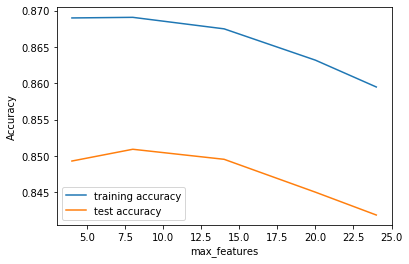

In [586]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


###### accuracy comes down after 8 for both train and test lets take max features as 8

######  Tuning min_samples_leaf

In [587]:

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

rf3 = RandomForestClassifier(max_features=8,n_estimators=100,max_depth=7,class_weight='balanced')


# fit tree on training data
rfgs = GridSearchCV(rf3, parameters, 
                    cv=5, 
                   scoring="accuracy",return_train_score=True)
rfgs.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features=8,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              random_

In [588]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.959871,0.075705,0.037100,0.002390,100,{'min_samples_leaf': 100},0.829286,0.820714,0.822381,0.826667,0.813571,0.822524,0.005410,1,0.832321,0.832143,0.829464,0.831012,0.832976,0.831583,0.001234
1,4.877398,0.090049,0.036301,0.000486,150,{'min_samples_leaf': 150},0.814048,0.808810,0.815714,0.815238,0.802143,0.811190,0.005149,2,0.816667,0.818869,0.817381,0.813333,0.820476,0.817345,0.002395
2,4.661315,0.072889,0.035928,0.000642,200,{'min_samples_leaf': 200},0.810238,0.798810,0.801190,0.799762,0.790238,0.800048,0.006372,3,0.807976,0.808333,0.805000,0.801429,0.805893,0.805726,0.002485
3,4.466506,0.076313,0.038106,0.006937,250,{'min_samples_leaf': 250},0.801667,0.787619,0.794762,0.793095,0.786667,0.792762,0.005422,4,0.796310,0.797679,0.797440,0.793631,0.800536,0.797119,0.002232
4,4.178087,0.026935,0.034808,0.002329,300,{'min_samples_leaf': 300},0.795714,0.778810,0.782619,0.785238,0.773095,0.783095,0.007516,5,0.793274,0.790595,0.785119,0.787202,0.787024,0.788643,0.002911


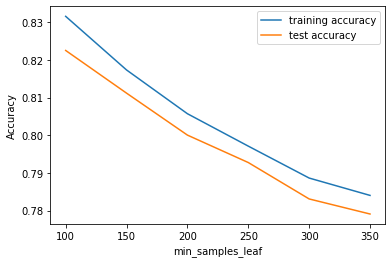

In [589]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###### selecting minimal sample leafs 100

###### Tuning min_samples_split

In [590]:
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

rf4 = RandomForestClassifier(min_samples_leaf=100,max_features=8,n_estimators=100,max_depth=7,class_weight='balanced')


# fit tree on training data
rfgs = GridSearchCV(rf4, parameters, 
                    cv=5, 
                   scoring="accuracy",return_train_score=True)
rfgs.fit(X_train_pca, y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=7,
                                              max_features=8,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=100,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [591]:
# scores of GridSearch CV
scores = rfgs.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.252670,0.136291,0.038311,0.002057,200,{'min_samples_split': 200},0.827381,0.817857,0.824286,0.826190,0.816667,0.822476,0.004387,1,0.834167,0.832321,0.831190,0.825357,0.834464,0.831500,0.003299
1,5.980262,0.438264,0.047474,0.014787,250,{'min_samples_split': 250},0.825238,0.815714,0.824048,0.821667,0.813571,0.820048,0.004610,2,0.829702,0.830952,0.828036,0.823036,0.827976,0.827940,0.002692
2,5.523499,0.253435,0.038494,0.001024,300,{'min_samples_split': 300},0.823095,0.808571,0.815952,0.818571,0.806905,0.814619,0.006088,3,0.825060,0.824702,0.819762,0.820655,0.824762,0.822988,0.002290
3,5.506451,0.221867,0.040698,0.002771,350,{'min_samples_split': 350},0.820952,0.807619,0.813571,0.819762,0.800238,0.812429,0.007739,4,0.820893,0.820298,0.815238,0.816905,0.819821,0.818631,0.002182
4,4.908502,0.230306,0.037171,0.002796,400,{'min_samples_split': 400},0.815714,0.806667,0.810476,0.810714,0.799762,0.808667,0.005300,5,0.814107,0.816429,0.814464,0.812679,0.815952,0.814726,0.001345


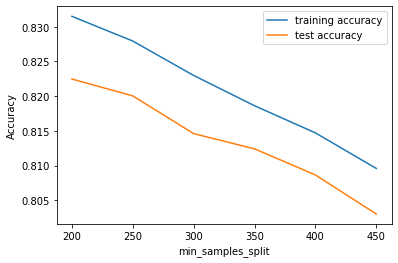

In [592]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

###### min_sample split is 200

###### Now lets run the Tunned Random Forest

In [593]:
rf_final = RandomForestClassifier(max_depth=7,
                                  n_estimators=100,
                                  max_features=8,
                                  min_samples_leaf=100,
                                  min_samples_split=200,
                                  random_state=10,class_weight='balanced')

In [594]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_pca,y_train)

Model performance on Train data:

Model Report
Accuracy : 0.8121
Recall/Sensitivity : 0.7907
AUC Score (Train): 0.897108
CV Score : Mean - 0.8572985 | Std - 0.01309811 | Min - 0.8383583 | Max - 0.8724838


In [595]:
# predict on test data
predictions = rf_final.predict(X_test_pca)

In [596]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.788616248535531
accuracy : 0.8246861459837795
Sensitivity/Recall : 0.7453333333333333
Specificity: 0.8318991637377288
False Positive Rate: 0.16810083626227124
Positive predictive value: 0.28725590955806785
Negative Predictive value: 0.9729270021261517
sklearn precision score value: 0.28725590955806785


###### Recall is 74.53% lets find the optimal cutoff and see if it get better

In [597]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rf_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8121286639068768
accuracy : 0.8301428571428572
Sensitivity/Recall : 0.7906564163217031
Specificity: 0.8336009114920503
False Positive Rate: 0.16639908850794966
Positive predictive value: 0.29384615384615387
Negative Predictive value: 0.9784802431610943
sklearn precision score value: 0.29384615384615387


,churn,churn_Prob,final_predicted
11785,0,0.308512,0
11987,0,0.106183,0
11648,0,0.550431,1
12890,0,0.454086,0
3762,0,0.153584,0


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.214857  1.000000  0.146098
0.2   0.2  0.427190  0.987581  0.378114
0.3   0.3  0.617238  0.952691  0.587861
0.4   0.4  0.755143  0.876404  0.744523
0.5   0.5  0.830143  0.790656  0.833601
0.6   0.6  0.881143  0.693081  0.897613
0.7   0.7  0.912524  0.547014  0.944534
0.8   0.8  0.925476  0.297457  0.980475
0.9   0.9  0.921714  0.043170  0.998653


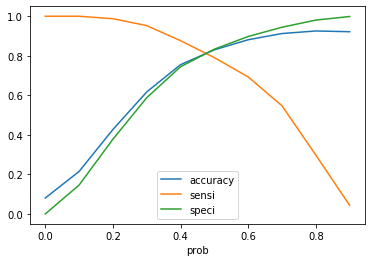

In [598]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

###### From the curve above, 0.45 is the optimal point 

In [599]:
cut_off_prob=0.45
predictChurnWithProb(rf_final,X_train_pca,y_train,cut_off_prob)

Roc_auc_score : 0.8148128422447972
accuracy : 0.7963809523809524
Sensitivity/Recall : 0.836782968657599
Specificity: 0.7928427158319954
False Positive Rate: 0.20715728416800455
Positive predictive value: 0.2613111726685134
Negative Predictive value: 0.9822906641000962
sklearn precision score value: 0.2613111726685134


,churn,churn_Prob,final_predicted
11785,0,0.308512,0
11987,0,0.106183,0
11648,0,0.550431,1
12890,0,0.454086,1
3762,0,0.153584,0
...,...,...,...
12119,0,0.144679,0
24423,0,0.147125,0
14147,0,0.646289,1
23320,0,0.671606,1


In [600]:
y_test_df= predictChurnWithProb(rf_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7882550801923
accuracy : 0.790689923341851
Sensitivity/Recall : 0.7853333333333333
Specificity: 0.7911768270512665
False Positive Rate: 0.20882317294873348
Positive predictive value: 0.254757785467128
Negative Predictive value: 0.9759306323815219
sklearn precision score value: 0.254757785467128


,churn,churn_Prob,final_predicted
6102,1,0.609840,1
2539,1,0.444356,0
21576,0,0.552753,1
19574,0,0.206839,0
12804,1,0.798242,1


###### After finding the optimal cutoff for sensivity and roc has improved


###### Train roc :81.21% Train Sensivity:73.67%
###### Test roc :78.85% Test Sensivity: 78.53%

###### lets Run a grid Search to Find Optimal Hyperparameters
###### Note: this is taking more time than anticipated I request to  perform if only you have have enough CPU resources and time

In [538]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,
                          cv = 5, verbose = 1, n_jobs=-1,return_train_score=True)

In [539]:
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 51.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 67.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [540]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8199523809523809 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 300}


In [541]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=12,
                             min_samples_leaf=150, 
                             min_samples_split=200,
                             max_features=20,
                             n_estimators=300)

In [542]:
print("Model performance on Train data:")
modelfit(rfc_final,X_train_pca,y_train)

Model performance on Train data:

Model Report
Accuracy : 0.8119
Recall/Sensitivity : 0.7901
AUC Score (Train): 0.899694
CV Score : Mean - 0.8555807 | Std - 0.01046251 | Min - 0.8380649 | Max - 0.8681295


In [543]:
# predict on test data
predictions = rfc_final.predict(X_test_pca)

In [544]:
print("Model performance on Test data:")
getModelMetrics(y_test,predictions)

Model performance on Test data:
Roc_auc_score : 0.7915859087787339
accuracy : 0.8256860348850128
Sensitivity/Recall : 0.7506666666666667
Specificity: 0.8325051508908011
False Positive Rate: 0.16749484910919887
Positive predictive value: 0.28946015424164523
Negative Predictive value: 0.9734977324263039
sklearn precision score value: 0.28946015424164523


###### Based on the above parameters provided we could see:
###### Train roc :89.99%  Train Sensivity:79.01%
###### Test  roc :79.15%  Test Sensivity: 75.06% 
###### Lets see if we can imporve it further by adding cutoff

In [549]:


# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(rfc_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8118588755396035
accuracy : 0.8301428571428572
Sensitivity/Recall : 0.7900650502661147
Specificity: 0.8336527008130924
False Positive Rate: 0.16634729918690766
Positive predictive value: 0.2937554969217238
Negative Predictive value: 0.9784220763433017
sklearn precision score value: 0.2937554969217238


,churn,churn_Prob,final_predicted
11785,0,0.248976,0
11987,0,0.096203,0
11648,0,0.606026,1
12890,0,0.367329,0
3762,0,0.151172,0


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.274429  1.000000  0.210886
0.2   0.2  0.480238  0.986990  0.435859
0.3   0.3  0.651190  0.952099  0.624838
0.4   0.4  0.762190  0.882318  0.751670
0.5   0.5  0.830143  0.790065  0.833653
0.6   0.6  0.874048  0.693672  0.889844
0.7   0.7  0.907762  0.580130  0.936455
0.8   0.8  0.922429  0.380248  0.969910
0.9   0.9  0.923429  0.094619  0.996012


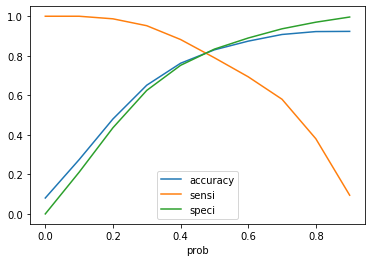

In [550]:
findOptimalCutoff(y_train_df)

In [551]:

y_test_df= predictChurnWithProb(rfc_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7915859087787339
accuracy : 0.8256860348850128
Sensitivity/Recall : 0.7506666666666667
Specificity: 0.8325051508908011
False Positive Rate: 0.16749484910919887
Positive predictive value: 0.28946015424164523
Negative Predictive value: 0.9734977324263039
sklearn precision score value: 0.28946015424164523


,churn,churn_Prob,final_predicted
6102,1,0.576586,1
2539,1,0.417827,0
21576,0,0.678847,1
19574,0,0.142070,0
12804,1,0.869057,1


###### Based on the above parameters provided we could see:
###### Train roc :81.18%  Train Sensivity:79.00%
###### Test  roc :79.15%  Test Sensivity: 83.25% 

###### Boosting

In [232]:
### As studied in our modules lets apply boosting mechanism.

## 10.Gradient boosting classifier

In [569]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Fitting the default GradientBoostingClassifier
#gbm0 = GradientBoostingClassifier(random_state=10)
#modelfit(gbm0, X_train_pca, y_train)


Model Report
Accuracy : 0.6393
Recall/Sensitivity : 0.2868
AUC Score (Train): 0.903003
CV Score : Mean - 0.8647562 | Std - 0.009748521 | Min - 0.8491959 | Max - 0.8773446


###### Note taking longer time

In [570]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
gbc= GradientBoostingClassifier(random_state=10)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = gbc, param_grid = param_grid,refit='recall_score' ,
                          cv = 3, verbose = 1, n_jobs=-1,return_train_score=True)

In [193]:
grid_search.fit(X_train_pca,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.9min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 923.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [195]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9254800802522213 using {'max_depth': 12, 'max_features': 20, 'min_samples_leaf': 150, 'min_samples_split': 200, 'n_estimators': 300}


In [571]:
gbm_final = GradientBoostingClassifier(learning_rate=0.1, n_estimators=300,max_features=20,max_depth=12, min_samples_split=200, min_samples_leaf=150, subsample=1.0, random_state=10)
modelfit(gbm_final, X_train_pca, y_train)


Model Report
Accuracy : 0.9985
Recall/Sensitivity : 0.997
AUC Score (Train): 1.000000
CV Score : Mean - 0.8639325 | Std - 0.01017711 | Min - 0.8506905 | Max - 0.8791793


In [572]:
# predict on test data
dpredictions = gbm_final.predict(X_test_pca)

In [573]:
print("Model performance on Test data:")
getModelMetrics(y_test,dpredictions)

Model performance on Test data:
Roc_auc_score : 0.6368495939886075
accuracy : 0.9242306410398845
Sensitivity/Recall : 0.292
Specificity: 0.9816991879772149
False Positive Rate: 0.018300812022785117
Positive predictive value: 0.5918918918918918
Negative Predictive value: 0.9384775808133472
sklearn precision score value: 0.5918918918918918


###### the above stats depict poor peformance so lets try passing a prob cut off 

In [574]:
# predicting churn with default cut-off 0.45
cut_off_prob=0.5
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9985215848610289
accuracy : 0.9997619047619047
Sensitivity/Recall : 0.997043169722058
Specificity: 1.0
False Positive Rate: 0.0
Positive predictive value: 1.0
Negative Predictive value: 0.9997411204307756
sklearn precision score value: 1.0


,churn,churn_Prob,final_predicted
11785,0,0.002826,0
11987,0,0.002187,0
11648,0,0.020875,0
12890,0,0.013277,0
3762,0,0.004721,0


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.970048  1.000000  0.967425
0.2   0.2  0.995429  1.000000  0.995028
0.3   0.3  0.999048  1.000000  0.998964
0.4   0.4  0.999619  0.999409  0.999637
0.5   0.5  0.999762  0.997043  1.000000
0.6   0.6  0.998762  0.984624  1.000000
0.7   0.7  0.993429  0.918391  1.000000
0.8   0.8  0.974667  0.685393  1.000000
0.9   0.9  0.935143  0.194559  1.000000


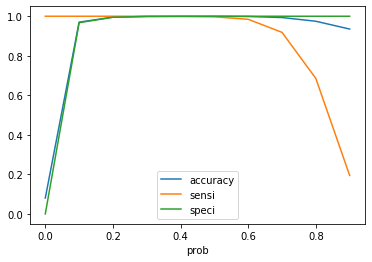

In [575]:
findOptimalCutoff(y_train_df)

In [579]:
# predicting churn with  cut-off 0.2
cut_off_prob=0.2
y_train_df = predictChurnWithProb(gbm_final,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.997514112589984
accuracy : 0.9954285714285714
Sensitivity/Recall : 1.0
Specificity: 0.9950282251799679
False Positive Rate: 0.004971774820032109
Positive predictive value: 0.9462786793508674
Negative Predictive value: 1.0
sklearn precision score value: 0.9462786793508674


,churn,churn_Prob,final_predicted
11785,0,0.002826,0
11987,0,0.002187,0
11648,0,0.020875,0
12890,0,0.013277,0
3762,0,0.004721,0


##### Making the predictions on test

In [580]:
y_test_df= predictChurnWithProb(gbm_final,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.7512757241546479
accuracy : 0.9173425174980557
Sensitivity/Recall : 0.552
Specificity: 0.9505514483092958
False Positive Rate: 0.049448551690704154
Positive predictive value: 0.5036496350364964
Negative Predictive value: 0.9589191832742389
sklearn precision score value: 0.5036496350364964


,churn,churn_Prob,final_predicted
6102,1,0.206808,1
2539,1,0.055639,0
21576,0,0.079934,0
19574,0,0.007737,0
12804,1,0.076302,0


In [ ]:
###### with Gradiant boosting Classifier test set is giving poor performance stats.

###### Train roc :99.75%  Train Sensivity:1.0%
###### Test  roc :75.12%  Test Sensivity: 55.2% 

######  Overfiting

## 11.XG boosting classifier

In [581]:
###### remember to install xgboost

In [582]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
# Fitting the XGBClassifier
xgb1 = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective= 'binary:logistic',
                    nthread=4,
                    scale_pos_weight=1,
                    seed=27)

In [583]:
# Model fit and performance on Train data
modelfit(xgb1, X_train_pca, y_train)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.8633468 | Std - 0.009969948 | Min - 0.8471796 | Max - 0.8758737


In [601]:
# Hyperparameter tunning for the XGBClassifer
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch1.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fa

In [602]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_child_weight': 5}, 0.33546355068459394)

In [603]:
# Some more hyperparameter tunning for the XGBClassifer
param_test2 = param_test3 = {'gamma':[i/10.0 for i in range(0,5)]}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=5, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=3)
gsearch2.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=5,
                                     missing=None, n_estimators=140, n_jobs=1,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, verbosity=1),
             iid=False, n_jobs=4,
             param_grid={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [604]:
gsearch2.best_params_, gsearch2.best_score_

({'gamma': 0.4}, 0.3414473253699548)

In [605]:
# Final XGBClassifier
xgb2 = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=5, gamma=0.4, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [606]:
# Fit Train data
modelfit(xgb2, X_train_pca, y_train)


Model Report
Accuracy : 0.7384
Recall/Sensitivity : 0.4826
AUC Score (Train): 0.958321
CV Score : Mean - 0.8744707 | Std - 0.007283876 | Min - 0.8634242 | Max - 0.8849157


In [607]:
# Prediction on Test data
dtest_predictions = xgb2.predict(X_test_pca)

In [608]:
# Model evaluation on Test data
getModelMetrics(y_test,dtest_predictions)

Roc_auc_score : 0.6450313093362421
accuracy : 0.9270081102099766
Sensitivity/Recall : 0.30666666666666664
Specificity: 0.9833959520058175
False Positive Rate: 0.016604047994182525
Positive predictive value: 0.6267029972752044
Negative Predictive value: 0.9397729905026639
sklearn precision score value: 0.6267029972752044


In [609]:
# predicting churn with default cut-off 0.5
cut_off_prob=0.5
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.7384289380227609
accuracy : 0.9530952380952381
Sensitivity/Recall : 0.48255470136014195
Specificity: 0.9943031746853799
False Positive Rate: 0.005696825314620125
Positive predictive value: 0.8812095032397408
Negative Predictive value: 0.9564112782703995
sklearn precision score value: 0.8812095032397408


,churn,churn_Prob,final_predicted
11785,0,0.059972,0
11987,0,0.008159,0
11648,0,0.091523,0
12890,0,0.025700,0
3762,0,0.010972,0


     prob  accuracy     sensi     speci
0.0   0.0  0.080524  1.000000  0.000000
0.1   0.1  0.877571  0.902425  0.875395
0.2   0.2  0.931381  0.801301  0.942773
0.3   0.3  0.949238  0.706682  0.970480
0.4   0.4  0.954000  0.593732  0.985551
0.5   0.5  0.953095  0.482555  0.994303
0.6   0.6  0.943476  0.311650  0.998809
0.7   0.7  0.930762  0.142519  0.999793
0.8   0.8  0.922905  0.042578  1.000000
0.9   0.9  0.919524  0.000591  1.000000


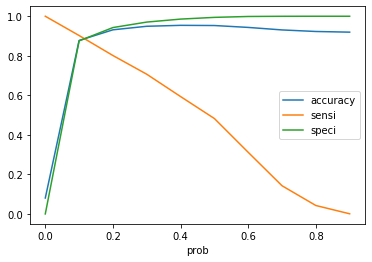

In [610]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [611]:
cut_off_prob=0.1
y_train_df = predictChurnWithProb(xgb2,X_train_pca,y_train,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.8889097472004288
accuracy : 0.8775714285714286
Sensitivity/Recall : 0.9024246008279124
Specificity: 0.8753948935729453
False Positive Rate: 0.12460510642705475
Positive predictive value: 0.38809766022380465
Negative Predictive value: 0.9903327865010546
sklearn precision score value: 0.38809766022380465


,churn,churn_Prob,final_predicted
11785,0,0.059972,0
11987,0,0.008159,0
11648,0,0.091523,0
12890,0,0.025700,0
3762,0,0.010972,0


In [612]:
y_test_df= predictChurnWithProb(xgb2,X_test_pca,y_test,cut_off_prob)
y_test_df.head()

Roc_auc_score : 0.8124327556255808
accuracy : 0.8516831463170759
Sensitivity/Recall : 0.7653333333333333
Specificity: 0.8595321779178281
False Positive Rate: 0.14046782208217184
Positive predictive value: 0.33121754183496827
Negative Predictive value: 0.9757842597688497
sklearn precision score value: 0.33121754183496827


,churn,churn_Prob,final_predicted
6102,1,0.235556,1
2539,1,0.134413,1
21576,0,0.196373,1
19574,0,0.022309,0
12804,1,0.282859,1


######  XG boosting Classifier with optimal cutoff.

###### Train roc :88.89%  Train Sensivity:90.24%
###### Test  roc :81.24%  Test Sensivity: 76.53% 

## 12.Overall Metrics

###### ----------------------------------------------------------------------------------------
###### Logistic regression RFE (without PCA ) with optimal cutoff 
###### Train Accuracy:83.65% Train Sensivity: 79.89%
###### Test Acurracy :84.51% Test Sensivity :79.89%

###### ----------------------------------------------------------------------------------------


###### Logistic Regression after PCA with optimal cutoff:
###### train sensitivity : 80.24%, train roc auc score : 78.19%
###### test sensitivity : 81.2%, test roc auc score : 78.77%

###### ----------------------------------------------------------------------------------------

###### Decision tree after selecting optimal cut-off  

###### Train Roc_auc_score : 76.46% and Sensivity: 81.19% 
###### Test Roc_auc_score : 75.46% and Sensivity : 79.2% 


###### ----------------------------------------------------------------------------------------

######  Random forest with optimal cutoff 
###### Tunned parameters

###### Train roc :81.21% Train Sensivity:73.67%
###### Test roc :78.85% Test Sensivity: 78.53%

###### With Grid Search Optimal parameters

###### Train roc :89.99%  Train Sensivity:79.01%
###### Test  roc :79.15%  Test Sensivity: 75.06%


###### ----------------------------------------------------------------------------------------

######  Gradiant boosting Classifier with optimal cutoff

###### Train roc :99.75%  Train Sensivity:1.0%
###### Test  roc :75.12%  Test Sensivity: 55.2% 


###### ----------------------------------------------------------------------------------------

######  XG boosting Classifier with optimal cutoff

###### Train roc :88.89%  Train Sensivity:90.24%
###### Test  roc :81.24%  Test Sensivity: 76.53%  






        
        
        

Overall, the Logistic Regression model with probability cut-off = 0.5, performed best. It achieved the best recall accuracy of 78.7% for test data. Also the overall accuracy and specificity is consistent for Test and train data, thus avoiding overfitting. 

Next the Decision Tree and Random Forest have done good without overfitting.

Among the Bossting Methods, Gradient Boosting Classifer and XGBoost Classifier both tend to overfit the training data.

## 13.features to predict churn 

### Identifying relevant churn features
##### We will use an instance of Random Forest classifier to identify the features most relevant to churn.

In [614]:
rfc_final.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=12, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=150, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

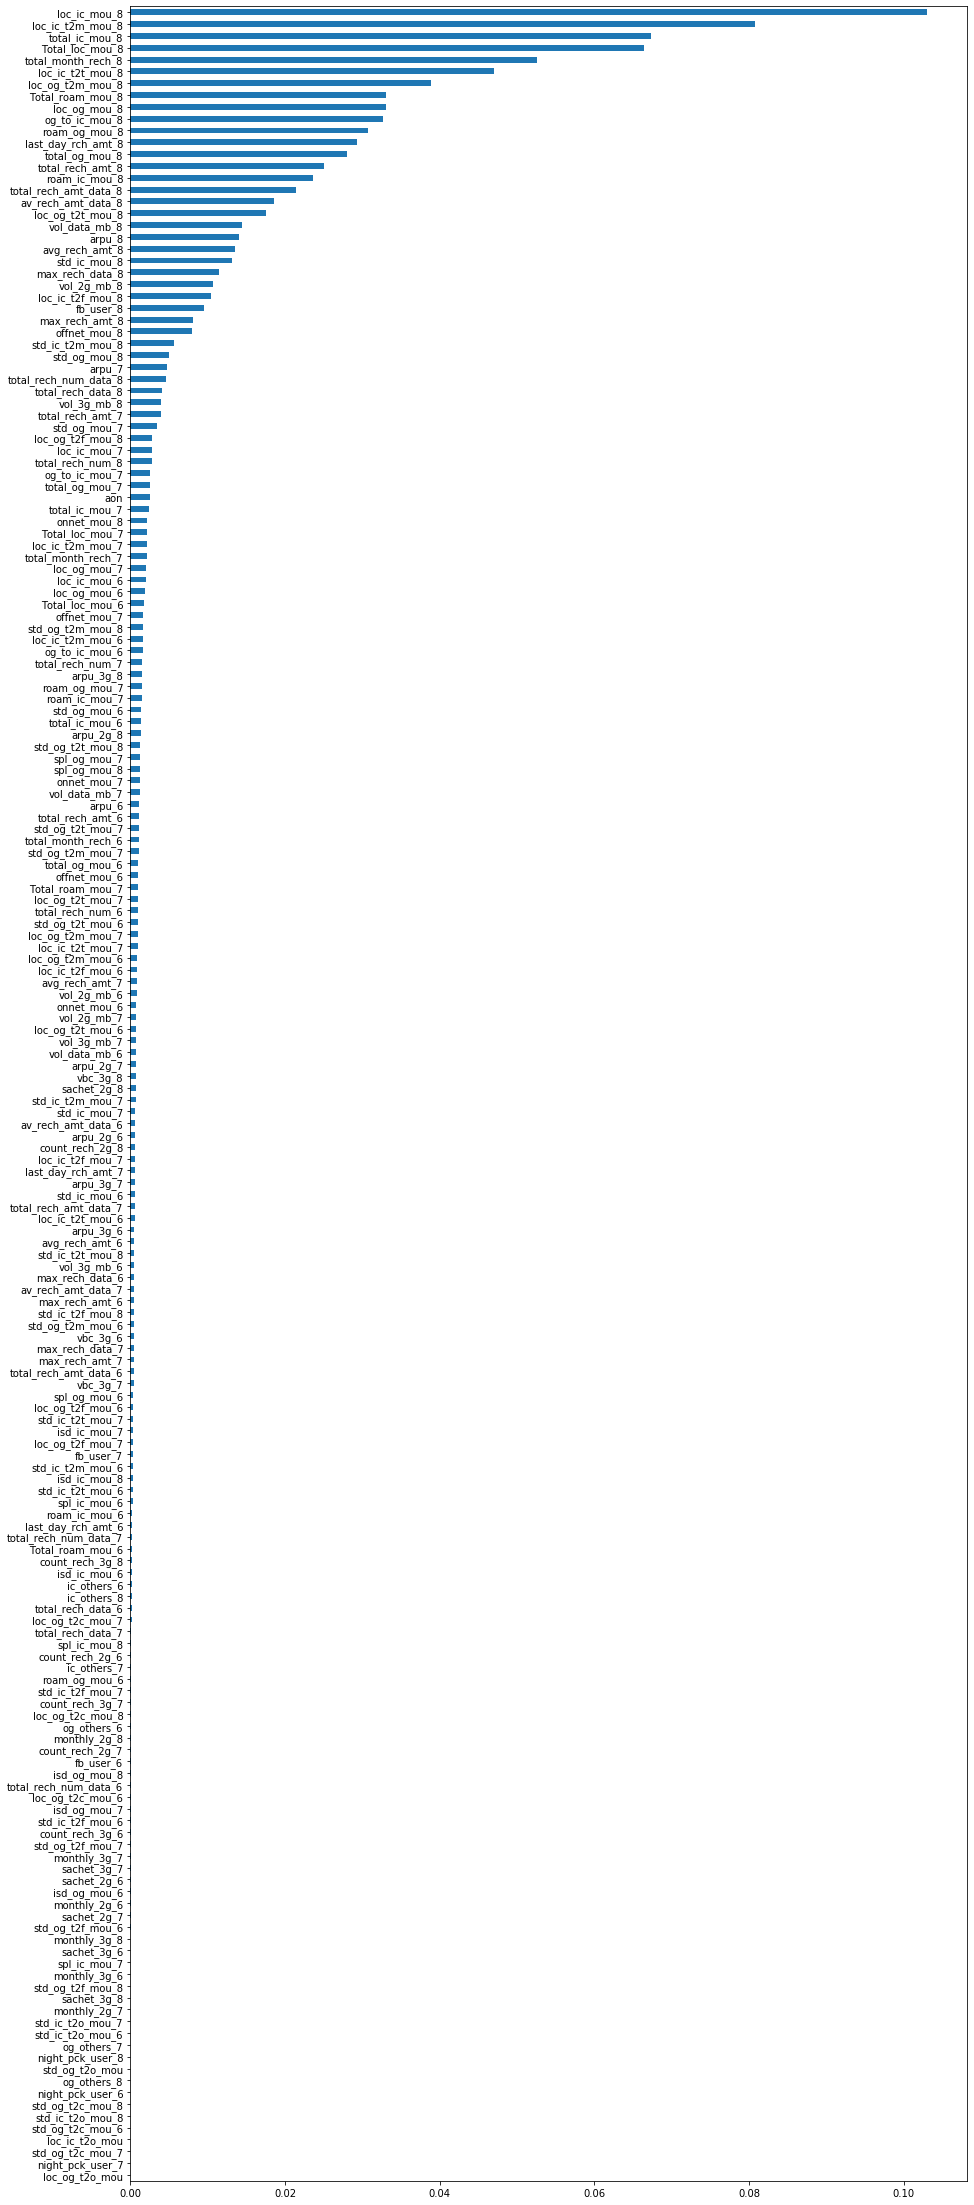

In [615]:
plt.figure(figsize=(15,40))
feat_importances = pd.Series(rfc_final.feature_importances_, index=X.columns)
feat_importances.nlargest(len(X.columns)).sort_values().plot(kind='barh', align='center')

In [619]:
##feat_importances.nlargest(len(X.columns)).sort_values(ascending=False)


###### Below are the  top 25 features ranked in order of importance,these features belong to month 8 i.e., the action month. Hence, it is clear that what happens in the action phase has a direct impact on the customer churn of high value customers., these features are as follows:

loc_ic_mou_8             
loc_ic_t2m_mou_8         
total_ic_mou_8           
Total_loc_mou_8          
total_month_rech_8       
loc_ic_t2t_mou_8         
loc_og_t2m_mou_8         
Total_roam_mou_8        
loc_og_mou_8             
og_to_ic_mou_8          
roam_og_mou_8            
last_day_rch_amt_8       
total_og_mou_8          
total_rech_amt_8         
roam_ic_mou_8            
total_rech_amt_data_8    
av_rech_amt_data_8       
loc_og_t2t_mou_8         
vol_data_mb_8            
arpu_8                   
avg_rech_amt_8           
std_ic_mou_8            
max_rech_data_8         
vol_2g_mb_8              
loc_ic_t2f_mou_8         
            


## 14. Recommendation

###### Customers who are lookingg to churn seems to be well predicted by drop in usage for all the incoming and outgoing calls.Features like ARPU and data usage (2g and 3g) are also seeing a huge drop in the  numbers which will give the company time to react and retain customer when these are tracked.
###### Suprisingly churners show higher roaming usage than non-churners. Network quality/latencies ,Roaming charges,Network availability anything might be the cause, best thing would be to get in touch with consumer and take his feedback to work on the identified isuues.
###### Tailor some offers and promotions keeping their needs in mind.

.